<a href="https://colab.research.google.com/github/paul2596/Data-Science-Hackathon/blob/main/notebook_files/xgboost_oswt_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Flow

In [ ]:
!pip install mlflow
!databricks configure --host https://community.cloud.databricks.com/

Username: paul2596@gmail.com
Password: 
Repeat for confirmation: 


D@tabrick_oswt25$

In [ ]:
import mlflow
mlflow.set_tracking_uri("databricks")
mlflow.set_experiment("/Users/paul2596@gmail.com/oswt")

<Experiment: artifact_location='dbfs:/databricks/mlflow-tracking/3598469014038156', creation_time=1689170704143, experiment_id='3598469014038156', last_update_time=1689813653395, lifecycle_stage='active', name='/Users/paul2596@gmail.com/oswt', tags={'mlflow.experiment.sourceName': '/Users/paul2596@gmail.com/oswt',
 'mlflow.experimentType': 'MLFLOW_EXPERIMENT',
 'mlflow.ownerEmail': 'paul2596@gmail.com',
 'mlflow.ownerId': '4056997620041211'}>

# Import that require installation

In [1]:
!pip install netCDF4
import netCDF4 as nc
#from mpl_toolkits.basemap import Basemap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 39.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 66.8 MB/s eta 0:00:00


In [2]:
!pip install windrose
from windrose import WindroseAxes

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Imports

In [4]:
import time
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import xarray as xr

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import KMeans
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import pickle


# Initialize Class and Functions

In [5]:
class ModelAndMetrics:
  def __init__(self,modelVal,modelName,testType):
    self.model = modelVal
    self.model_name = modelName
    self.modelFit = None
    self.predicted_y = None
    self.y_test = None
    self.test_type = testType
    self.mse = None
    self.rmse = None
    self.rsquared = None

def initializeMainDatasets():
  ele_df = pd.read_csv('/content/drive/MyDrive/2018_2021_oswt/LDT-10m-Tur-Ele_2019-2021.csv')
  met_df = pd.read_csv('/content/drive/MyDrive/2018_2021_oswt/LDT-10m-Met_2019-2021.csv')
  tur_df = pd.read_csv('/content/drive/MyDrive/2018_2021_oswt/LDT-10m-Tur-Tur_2019-2021.csv')
  ctr_df = pd.read_csv('/content/drive/MyDrive/2018_2021_oswt/LDT-10m-Tur-Ctr_2019-2021.csv')

  ele_df["StartTime"] = pd.to_datetime(ele_df["StartTime"])
  met_df["StartTime"] = pd.to_datetime(met_df["StartTime"])
  tur_df["StartTime"] = pd.to_datetime(tur_df["StartTime"])
  ctr_df["StartTime"] = pd.to_datetime(ctr_df["StartTime"])

  return ele_df, met_df, tur_df, ctr_df


def initializeOtherDatasets():
  prs_df = pd.read_csv('/content/drive/MyDrive/2018_2021_oswt/LDT-10m-Tur-Prs_2019-2021.csv')
  unk_df = pd.read_csv('/content/drive/MyDrive/2018_2021_oswt/LDT-10m-Tur-Unk_2019-2021.csv')
  usl_df = pd.read_csv('/content/drive/MyDrive/2018_2021_oswt/LDT-10m-Tur-Usl_2019-2021.csv')
  sub_df = pd.read_csv('/content/drive/MyDrive/2018_2021_oswt/LDT-10m-Sub_2019-2021.csv')
  ala_df = pd.read_csv('/content/drive/MyDrive/2018_2021_oswt/LDT-10m-Tur-Ala_2019-2021.csv')
  tmp_df = pd.read_csv('/content/drive/MyDrive/2018_2021_oswt/LDT-10m-Tur-Tmp_2019-2021.csv')

  prs_df["StartTime"] = pd.to_datetime(prs_df["StartTime"])
  unk_df["StartTime"] = pd.to_datetime(unk_df["StartTime"])
  usl_df["StartTime"] = pd.to_datetime(usl_df["StartTime"])
  sub_df["StartTime"] = pd.to_datetime(sub_df["StartTime"])
  ala_df["StartTime"] = pd.to_datetime(ala_df["StartTime"])
  tmp_df["StartTime"] = pd.to_datetime(tmp_df["StartTime"])

  return prs_df, unk_df, usl_df, sub_df, ala_df, tmp_df

In [6]:
def initializeMainDatasets_v2():
  ele_df = pd.read_csv('/content/drive/MyDrive/oswt/LDT-10m-Tur_2017-2021/LDT-10m-Tur-Ele_2017-2021.csv')
  met_df = pd.read_csv('/content/drive/MyDrive/oswt/LDT-10m-Met_2017-2021/LDT-10m-Met_2017-2021.csv')
  tur_df = pd.read_csv('/content/drive/MyDrive/oswt/LDT-10m-Tur_2017-2021/LDT-10m-Tur-Tur_2017-2021.csv')
  ctr_df = pd.read_csv('/content/drive/MyDrive/oswt/LDT-10m-Tur_2017-2021/LDT-10m-Tur-Ctr_2017-2021.csv')

  ele_df["StartTime"] = pd.to_datetime(ele_df["StartTime"])
  met_df["StartTime"] = pd.to_datetime(met_df["StartTime"])
  tur_df["StartTime"] = pd.to_datetime(tur_df["StartTime"])
  ctr_df["StartTime"] = pd.to_datetime(ctr_df["StartTime"])

  return ele_df, met_df, tur_df, ctr_df


def initializeOtherDatasets_v2():
  prs_df = pd.read_csv('/content/drive/MyDrive/oswt/LDT-10m-Tur_2017-2021/LDT-10m-Tur-Prs_2017-2021.csv')
  unk_df = pd.read_csv('/content/drive/MyDrive/oswt/LDT-10m-Tur_2017-2021/LDT-10m-Tur-Unk_2017-2021.csv')
  usl_df = pd.read_csv('/content/drive/MyDrive/oswt/LDT-10m-Tur_2017-2021/LDT-10m-Tur-Usl_2017-2021.csv')
  sub_df = pd.read_csv('/content/drive/MyDrive/oswt/LDT-10m-Sub_2017-2021/LDT-10m-Sub_2017-2021.csv')
  ala_df = pd.read_csv('/content/drive/MyDrive/oswt/LDT-10m-Tur_2017-2021/LDT-10m-Tur-Ala_2017-2021.csv')
  tmp_df = pd.read_csv('/content/drive/MyDrive/oswt/LDT-10m-Tur_2017-2021/LDT-10m-Tur-Tmp_2017-2021.csv')


  prs_df["StartTime"] = pd.to_datetime(prs_df["StartTime"])
  unk_df["StartTime"] = pd.to_datetime(unk_df["StartTime"])
  usl_df["StartTime"] = pd.to_datetime(usl_df["StartTime"])
  sub_df["StartTime"] = pd.to_datetime(sub_df["StartTime"])
  ala_df["StartTime"] = pd.to_datetime(ala_df["StartTime"])
  tmp_df["StartTime"] = pd.to_datetime(tmp_df["StartTime"])


  return prs_df , unk_df, usl_df, sub_df, ala_df, tmp_df

# ERA5 Data from turbine location

In [7]:
def load_era5_dataset(path):
  era_data = xr.open_dataset(path)
  era_data = era_data.to_dataframe()
  era_data.reset_index(inplace=True)
  era_data["time"] = pd.to_datetime(era_data["time"])
  era_data = era_data.set_index('time').resample('10T').interpolate()
  era_data.reset_index(inplace=True)
  era_data.rename(columns={'time': 'StartTime'}, inplace=True)
  #era_data = era_data.fillna(method='ffill')
  return era_data

In [8]:
era5_2018_2021_5km = load_era5_dataset('/content/drive/MyDrive/era5_new/combined_file_2018_2021_5km_away.nc')
#era5_2018_2021_30km = load_era5_dataset('/content/drive/MyDrive/era5_new/combined_file_2018_2021_30km_away.nc')
era5_2018_2021_30km = load_era5_dataset('/content/drive/MyDrive/era5_new/offshore_v1/combined_era5_2019_2021.nc')#p140209 - Air density over the oceans, sp- Surface pressure, tp-Total precipitation
era5_2018_2021_30km_land = load_era5_dataset('/content/drive/MyDrive/era5_30km_radius_on_land/combined_file_2018_2021_30km_on_land.nc')

era5_stability_2018_2021_5km = load_era5_dataset('/content/drive/MyDrive/era5_new/invObukhovLength_combined_file_2018_2021_5km_away.nc')
era5_stability_2018_2021_30km = load_era5_dataset('/content/drive/MyDrive/era5_new/invObukhovLength_combined_file_2018_2021_30km_away.nc')
era5_stability_2018_2021_30km_land = load_era5_dataset('/content/drive/MyDrive/era5_30km_radius_on_land/invObukhovLength_combined_file_2018_2021_30km_on_land.nc')

In [9]:
era5_2018_2021_5km_comb = pd.merge(era5_2018_2021_5km, era5_stability_2018_2021_5km, on='StartTime', how='inner')
era5_stability_2018_2021_30km_comb = pd.merge(era5_2018_2021_30km, era5_stability_2018_2021_30km, on='StartTime', how='inner')
era5_stability_2018_2021_30km_land_comb = pd.merge(era5_2018_2021_30km_land, era5_stability_2018_2021_30km_land, on='StartTime', how='inner')

In [10]:
era5_2018_2021_5km_comb = era5_2018_2021_5km_comb[['StartTime','iCalm','invL','t2m','sst']]
era5_stability_2018_2021_30km_comb = era5_stability_2018_2021_30km_comb[['StartTime','iCalm','invL','t2m','sst','p140209','d2m', 'msl', 'tp']]
era5_stability_2018_2021_30km_land_comb = era5_stability_2018_2021_30km_land_comb[['StartTime','iCalm','invL','t2m','skt']]

In [11]:
era5_2018_2021_5km_comb['t2m'] = era5_2018_2021_5km_comb['t2m'] - 273.15
era5_2018_2021_5km_comb['sst'] = era5_2018_2021_5km_comb['sst'] - 273.15

era5_stability_2018_2021_30km_comb['t2m'] = era5_stability_2018_2021_30km_comb['t2m'] - 273.15
era5_stability_2018_2021_30km_comb['sst'] = era5_stability_2018_2021_30km_comb['sst'] - 273.15
era5_stability_2018_2021_30km_comb['d2m'] = era5_stability_2018_2021_30km_comb['d2m'] - 273.15

#RH = 100 × {exp[17.625 × Dp/(243.04 + Dp)]/exp[17.625 × T/(243.04 + T)]}.
era5_stability_2018_2021_30km_comb['rh'] = 100 * (np.exp((17.625 * era5_stability_2018_2021_30km_comb['d2m']) / (243.04 + era5_stability_2018_2021_30km_comb['d2m'])) / np.exp((17.625 * era5_stability_2018_2021_30km_comb['t2m']) / (243.04 + era5_stability_2018_2021_30km_comb['t2m'])))


era5_stability_2018_2021_30km_comb.rename(columns={'p140209': 'air_density_over_ocean'}, inplace=True)

era5_stability_2018_2021_30km_land_comb['t2m'] = era5_stability_2018_2021_30km_land_comb['t2m'] - 273.15
era5_stability_2018_2021_30km_land_comb['sst'] = era5_stability_2018_2021_30km_land_comb['skt'] - 273.15
era5_stability_2018_2021_30km_land_comb.drop('skt', axis=1, inplace=True)


<ipython-input-11-325e5d7ea7b7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  era5_2018_2021_5km_comb['t2m'] = era5_2018_2021_5km_comb['t2m'] - 273.15
<ipython-input-11-325e5d7ea7b7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  era5_2018_2021_5km_comb['sst'] = era5_2018_2021_5km_comb['sst'] - 273.15
<ipython-input-11-325e5d7ea7b7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [12]:
era5_2018_2021_5km_comb['obhL'] = 1/era5_2018_2021_5km_comb['invL']
era5_stability_2018_2021_30km_comb['obhL'] = 1/era5_stability_2018_2021_30km_comb['invL']
era5_stability_2018_2021_30km_land_comb['obhL'] = 1/era5_stability_2018_2021_30km_land_comb['invL']

<ipython-input-12-ebb9293dfda8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  era5_2018_2021_5km_comb['obhL'] = 1/era5_2018_2021_5km_comb['invL']
<ipython-input-12-ebb9293dfda8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  era5_stability_2018_2021_30km_comb['obhL'] = 1/era5_stability_2018_2021_30km_comb['invL']


# Readings from hub and substation

In [ ]:
prs_df, unk_df, usl_df, sub_df, ala_df, tmp_df, = initializeOtherDatasets()

In [ ]:
temp_df = pd.merge(ctr_df, ele_df, on='StartTime', how='inner')

# Load MetMast, turbine, Ele Data 2019_2021

In [13]:
ele_df, met_df, tur_df, ctr_df  = initializeMainDatasets_v2() #initializeMainDatasets() #

## Preprocess and combine

In [14]:
temp_ele = ele_df[['StartTime','Power_kW_Mean']]

In [15]:
temp_ctrl_df = ctr_df[['StartTime','CtrlrState_Mean', 'CtrlrState_Stdev']] #CtrlrState_Min CtrlrState_Max CtrlrState_Stdev
#temp_tmp_df = tmp_df[['StartTime','AmbTemp_DegC_Stdev','AmbTemp_DegC_Mean', 'AmbTemp_Mean', 'AmbTemp_Stdev']]

In [16]:
temp_turb_df = tur_df[['StartTime','Pitch_Deg_Mean', 'Pitch_Deg_Stdev']] #,'WindSpeed1_Mean', 'WindSpeed1_Stdev','WindSpeed2_Mean', 'WindSpeed2_Stdev'

In [17]:
dfs = [temp_ele, met_df, temp_turb_df, temp_ctrl_df] #temp_turb_df #ala_df temp_ctrl_df prs_df tmp_df unk_df usl_df sub_df temp_ctrl_df ala_df

In [18]:
import functools as ft
df_final = ft.reduce(lambda left, right: pd.merge(left, right, on='StartTime', how='left'), dfs)

In [19]:
df_final = df_final[(df_final['Anemo_T_Mean']>0) ] #& (df_final['Power_kW_Mean']>0)

In [20]:
df_final = df_final[~((df_final['Anemo_T_Mean']<5) & (df_final['Power_kW_Mean']>2250))]

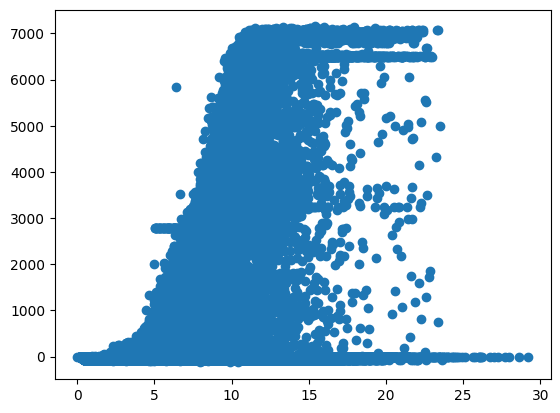

In [21]:
plt.scatter(df_final['Anemo_T_Mean'], df_final['Power_kW_Mean'])

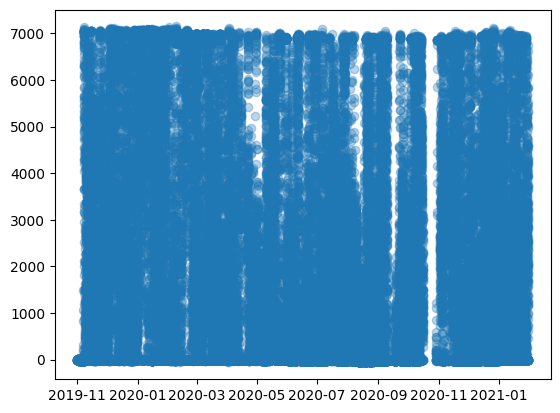

In [22]:
temp = df_final[(df_final['StartTime'] > pd.to_datetime('2019-11-01')) & (df_final['StartTime'] < pd.to_datetime('2021-01-31'))] #2021-01-31
plt.scatter(temp['StartTime'], temp['Power_kW_Mean'], alpha=0.3)

# Set Testcase

In [23]:
def create_test_case(test_case):
  enable_stdev = False
  test_features = { 'test_type':test_case,
                   'features' :['StartTime','Power_kW_Mean', 'Pitch_Deg_Mean', 'Anemo_T_Mean', 'WindVane_T_Mean'] } #'Pitch_Deg_Mean','Anemo_1_Mean','Anemo_2_Mean', CtrlrState_Mean

  if(test_case == 'initial_features_temp_pres'):
    test_features["features"].extend(['temp_T_Mean', #'temp_2_Mean',  'temp_1_Mean' 'Barometer_2_Mean',
      'Barmoeter_1_Mean'])

  elif(test_case == 'initial_features_temp'):
    test_features["features"].extend(['temp_T_Mean']) #,'temp_2_Mean',  'temp_1_Mean'

  elif(test_case == 'initial_features_pres'):
    test_features["features"].extend(['Barmoeter_1_Mean']) #'Barometer_2_Mean',

  elif(test_case == 'initial_features_t2m'):
    test_features["features"].extend(['t2m'])

  elif(test_case == 'initial_features_sst'):
    test_features["features"].extend(['sst'])

  elif(test_case == 'initial_features_t2m_sst'):
    test_features["features"].extend(['t2m', 'sst'])

  elif(test_case == 'initial_features_temp_diff'):
    test_features["features"].extend(['temp_diff'])

  elif(test_case == 'initial_features_air_density_over_ocean'):
    test_features["features"].extend(['air_density_over_ocean'])

  elif(test_case == 'initial_features_rh'):
    test_features["features"].extend(['rh'])

  elif(test_case == 'initial_features_d2m'): #2m dew point temperature
    test_features["features"].extend(['d2m'])

  elif(test_case == 'initial_features_t2m_d2m'): #2m dew point temperature
    test_features["features"].extend(['t2m', 'd2m'])

  elif(test_case == 'initial_features_msl'): #mean sea level pressure
    test_features["features"].extend(['msl'])

  elif(test_case == 'initial_features_obhL'):
    test_features["features"].extend(['obhL'])

  elif(test_case == 'initial_features_temp_pres_obhL'):
    test_features["features"].extend(['temp_T_Mean', 'Barmoeter_1_Mean', 'obhL']) #'Barometer_2_Mean','temp_2_Mean',  'temp_1_Mean' ,

  elif(test_case == 'initial_features_t2m_sst_obhL'):
    test_features["features"].extend(['t2m', 'sst', 'obhL'])

  elif(test_case == 'initial_features_temp_pres_t2m_sst'):
    test_features["features"].extend(['temp_T_Mean', 'Barmoeter_1_Mean', 't2m', 'sst']) #'Barometer_2_Mean','temp_2_Mean', 'temp_1_Mean' ,

  elif(test_case == 'initial_features_temp_press_t2m_sst_obhL'):
    test_features["features"].extend(['temp_T_Mean', 'Barmoeter_1_Mean', 't2m', 'sst', 'obhL']) #'Barometer_2_Mean',,'temp_2_Mean',  'temp_1_Mean',

  elif(test_case == 'initial_features_tp'): #total precipitation
    test_features["features"].extend(['tp'])


  #add standard deviation features obtained by combining 1 second readings to 10mintue intervals
  stdev_features = []
  if(enable_stdev == True):
    for value in test_features["features"]:
      if (value!='Power_kW_Mean') & (value.__contains__('Mean')):
        temp_val = value
        temp_val = temp_val.replace("Mean", "Stdev")
        stdev_features.append(temp_val)
    test_features["features"].extend(stdev_features)

  return test_features

# Dataset Split

In [24]:
#temp_df_final = temp_df_final[(temp_df_final['StartTime'].dt.month == 1) | (temp_df_final['StartTime'].dt.month == 2 ) | (temp_df_final['StartTime'].dt.month == 12)] #winter
#temp_df_final = temp_df_final[(temp_df_final['StartTime'].dt.month == 3) | (temp_df_final['StartTime'].dt.month == 4 ) | (temp_df_final['StartTime'].dt.month == 5)] #spring
#temp_df_final = temp_df_final[(temp_df_final['StartTime'].dt.month == 6) | (temp_df_final['StartTime'].dt.month == 7 ) | (temp_df_final['StartTime'].dt.month == 8)] #summer
#temp_df_final = temp_df_final[(temp_df_final['StartTime'].dt.month == 9) | (temp_df_final['StartTime'].dt.month == 10 ) | (temp_df_final['StartTime'].dt.month == 11)] #fall

In [25]:
temp_df_final = pd.DataFrame()
class TestSetClass:
  def __init__(self,start,end):
    self.start = start
    self.end = end
    self.X_test = None
    self.y_test = None
    self.X_test_scaled = None
    self.y_test_scaled = None
    self.test_time = None
    self.predicted_values = None

#initialize and split dataset
#directional split
def directional_split(direction_val, df_temp):
  directional_df = pd.DataFrame()
  if(direction_val=='west-ocean'):
    directional_df = df_temp[(df_temp['WindVane_T_Mean']  > 180+50.81) & (df_temp['WindVane_T_Mean'] < 180+50.81+120.891)]
  elif(direction_val == 'east-sea'):
    directional_df = df_temp[(df_temp['WindVane_T_Mean']  > 50.81) & (df_temp['WindVane_T_Mean'] < 120.891)]
  return directional_df

def get_train_set(start,end, df_temp):
  train_df_temp = df_temp[(df_temp['StartTime'] > pd.to_datetime(start)) & (df_temp['StartTime'] < pd.to_datetime(end))]
  train_time_temp = train_df_temp['StartTime']

  X_train_temp = train_df_temp.loc[:, ~train_df_temp.columns.isin(['Power_kW_Mean', 'StartTime'])]
  y_train_temp = train_df_temp[['Power_kW_Mean']]
  return X_train_temp, y_train_temp, train_time_temp

def get_test_set(start, end, df_temp):
  test_df_temp = df_temp[(df_temp['StartTime'] > pd.to_datetime(start)) & (df_temp['StartTime'] < pd.to_datetime(end))] #2021-01-31
  test_time_temp = test_df_temp['StartTime']

  X_test_temp = test_df_temp.loc[:, ~test_df_temp.columns.isin(['Power_kW_Mean', 'StartTime'])]
  y_test_temp = test_df_temp[['Power_kW_Mean']]
  return X_test_temp, y_test_temp, test_time_temp

def additional_test_set(df_temp):
  test_set_time = [{'start':'2021-01-05 00:00:00','end':'2021-01-05 23:55:00'},
                  {'start':'2021-01-15 00:00:00','end':'2021-01-15 23:55:00'},
                  {'start':'2021-02-08 00:00:00','end':'2021-02-08 23:55:00'},
                  {'start':'2021-02-26 00:00:00','end':'2021-02-26 23:55:00'},
                  {'start':'2021-03-03 00:00:00','end':'2021-03-03 23:55:00'},
                  {'start':'2021-03-18 00:00:00','end':'2021-03-18 23:55:00'}
                  #{'start':'2021-12-01 00:00:00','end':'2021-12-30 00:00:00'}
                  ]
  global temp_test_arr
  temp_test_arr = []
  for obj in test_set_time:
    temp_test_obj = TestSetClass(obj['start'],obj['end'])

    temp_test_obj.X_test, temp_test_obj.y_test, temp_test_obj.test_time = get_test_set(temp_test_obj.start, temp_test_obj.end,df_temp)
    print(obj['start'])
    #temp_test_obj.X_test_scaled = x_scaler.transform(temp_test_obj.X_test)
    #temp_test_obj.y_test_scaled = y_scaler.transform(temp_test_obj.y_test.values.reshape(-1, 1)).flatten()
    temp_test_arr.append(temp_test_obj)


def initalize_datasets(test_type, data_combination, direction_val):
  df_final_comb = pd.DataFrame()
  if(data_combination == 'orig-data'):
    #df_final_comb = df_final.copy()
    df_final_comb = pd.merge(df_final, era5_stability_2018_2021_30km_comb, on='StartTime', how='inner')
    df_final_comb['temp_diff'] = df_final_comb['t2m'] - df_final_comb['sst']
  elif(data_combination == 'orig-data-era5-30km-offshore-no-obhL'):
    df_final_comb = pd.merge(df_final, era5_stability_2018_2021_30km_comb, on='StartTime', how='inner')
    df_final_comb['temp_diff'] = df_final_comb['t2m'] - df_final_comb['sst']

  elif(data_combination == 'orig-data-era5-30km-offshore-obhL'):
    df_final_comb = pd.merge(df_final, era5_stability_2018_2021_30km_comb, on='StartTime', how='inner')
    df_final_comb = df_final_comb[(df_final_comb['iCalm'] ==0)]
    df_final_comb['temp_diff'] = df_final_comb['t2m'] - df_final_comb['sst']
  elif(data_combination == 'orig-data-era5-30km-onshore-no-obhL'):
    df_final_comb = pd.merge(df_final, era5_stability_2018_2021_30km_land_comb, on='StartTime', how='inner')
    df_final_comb['temp_diff'] = df_final_comb['t2m'] - df_final_comb['sst']

  elif(data_combination == 'orig-data-era5-30km-onshore-obhL'):
    df_final_comb = pd.merge(df_final, era5_stability_2018_2021_30km_land_comb, on='StartTime', how='inner')
    df_final_comb = df_final_comb[(df_final_comb['iCalm'] ==0)]
    df_final_comb['temp_diff'] = df_final_comb['t2m'] - df_final_comb['sst']

  df_final_comb = df_final_comb.dropna()
  testcase_obj = create_test_case(test_type) # temp_pres t2m_sst temp_pres_t2m_sst obhL temp_pres_obhL t2m_sst_obhL temp_press_t2m_sst_obhL

  #global temp_df_final

  temp_df_final = df_final_comb[testcase_obj.get('features')]
  if(direction_val != ''):
    temp_df_final = directional_split(direction_val,temp_df_final)

  X_train_temp, y_train_temp, train_time_temp = get_train_set('2019-11-01 00:00:00','2020-11-01 00:00:00',temp_df_final) #'2019-11-01 00:00:00','2020-11-01 00:00:00'
  X_test_temp, y_test_temp, test_time_temp = get_test_set('2020-11-01 00:00:00','2021-02-01 00:00:00',temp_df_final)
  additional_test_set(temp_df_final)

  return X_train_temp, y_train_temp,train_time_temp, X_test_temp, y_test_temp, test_time_temp

# Tune And Predict

In [ ]:
#'intial_features','initial_features_temp', 'initial_features_pres', 'initial_features_temp_pres', 'initial_features_temp_diff', 'initial_features_d2m' - 20hours

In [26]:
np.random.seed(42)

In [27]:
data_combinations = ['orig-data'] #,  'orig-data-era5-30km-offshore-no-obhL', 'orig-data-era5-30km-onshore-obhL','orig-data-era5-30km-onshore-no-obhL' , 'orig-data-era5-30km-offshore-obhL'
enable_mlflow = False

def tune_and_predict(direction_val):
  for comb in data_combinations:

    test_types = []
    if(comb=='orig-data'):
      test_types = ['intial_features','initial_features_temp', 'initial_features_pres', 'initial_features_temp_pres', 'initial_features_temp_diff', 'initial_features_t2m_d2m', 'initial_features_rh']

    elif(comb =='orig-data-era5-30km-offshore-obhL'):
      test_types = ['intial_features', 'initial_features_temp', 'initial_features_temp_diff', 'initial_features_t2m_d2m','initial_features_obhL'] #'initial_features_temp', 'initial_features_pres', 'initial_features_t2m', 'initial_features_sst',

    for test_type in test_types:
      title = 'XG_Boost'

      run_name  = title+'_'+test_type+'_'+comb
      if(direction_val!=''):
         run_name  = title+'_'+test_type+'_'+comb+'_'+direction_val
      model_sav_path = '/content/drive/MyDrive/oswt_modeling/xgboost/' #/content/drive/MyDrive/oswt_modeling/xgboost/
      #current_run = mlflow.start_run(run_name=run_name)
      X_train, y_train, train_time, X_test, y_test, test_time = initalize_datasets(test_type, comb, direction_val)
      print('\n')
      print(run_name)
      print('\n')

      pipeline = Pipeline([
          ('scaler', StandardScaler()),
          ('model', None)
      ])

      param_grids ={  # XGBRegressor parameters
              'model': [XGBRegressor()],
              'model__n_estimators': [200, 300, 400, 500],
              'model__max_depth': [3, 5, 10, 15, 20, 30, 40], #[int(x) for x in np.linspace(10, 60, num = 6)],
              'model__learning_rate': [0.1, 0.01, 0.001]
          }

      #mlflow.log_param("seed", 42)
      #grid_search = GridSearchCV(pipeline, param_grids, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
      grid_search = RandomizedSearchCV(pipeline, param_grids, n_iter = 50, scoring='neg_mean_squared_error', cv = 5, verbose=2, random_state=42, n_jobs = -1) #neg_mean_squared_error neg_mean_absolute_error neg_root_mean_squared_error
      #mlflow.sklearn.autolog()
      grid_search.fit(X_train, y_train)

      best_model = grid_search.best_estimator_
      best_params = grid_search.best_params_


      y_train_pred = best_model.predict(X_train)
      train_mse = mean_squared_error(y_train, y_train_pred)
      train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
      train_rsquared =  r2_score(y_train, y_train_pred) #y_test.values.reshape(-1, 1), modelObj.predicted_y
      train_mae = mean_absolute_error(y_train, y_train_pred)

      y_pred = best_model.predict(X_test)
      mse = mean_squared_error(y_test, y_pred)
      rmse = np.sqrt(mean_squared_error(y_test, y_pred))
      rsquared =  r2_score(y_test, y_pred) #y_test.values.reshape(-1, 1), modelObj.predicted_y
      mae = mean_absolute_error(y_test, y_pred)

      #residuals = pd.DataFrame({'PredPower':[y_pred], 'ActualPower':[y_test], 'Residual':[(y_test- y_pred)]})
      #residuals.to_csv(model_sav_path+run_name+"residuals.csv")
      #residuals

      print("TrainMSE:", train_mse)
      print("TrainRMSE:", train_rmse)
      print("TrainR2:", train_rsquared)
      print("TrainMAE:", train_mae)

      print("Best model:", best_model)
      print("Best parameters:", best_params)
      print("MSE:", mse)
      print("RMSE:", rmse)
      print("R2:", rsquared)
      print("MAE:", mae)


      metrics_df = pd.DataFrame({'Metrics': ['TrainMSE', 'TestMSE', 'TrainRMSE', 'TestRMSE', 'TrainR2', 'TestR2', 'TrainMAE', 'TestMAE'], 'Values': [train_mse, mse, train_rmse, rmse, train_rsquared, rsquared, train_mae, mae]})

      plt.figure(figsize=(12, 6))
      plt.plot(test_time, y_test, label ="Actual")
      plt.plot(test_time, y_pred, label ="Predictions")
      plt.title('Predictions on Test Set')

      plt.figure(figsize=(12, 6))
      plt.plot(train_time, y_train, label ="Actual")
      plt.plot(train_time, y_train_pred, label ="Predictions")
      plt.title('Predictions on Train Set')

      plt.savefig(model_sav_path+run_name+"_actual_vs_prediction.png")



      df = pd.DataFrame({'Metrics': ['TrainMSE', 'TestMSE'], 'Values': [train_mse, mse]})

      bargraph = df.plot.bar(x = 'Metrics', y = 'Values', fontsize='9', title=title, figsize=(8,8), rot=0)
      bargraph.bar_label(bargraph.containers[0])


      fig = bargraph.get_figure()
      fig.savefig(model_sav_path+run_name+"_mse_metrics.png",dpi=200)

      df = pd.DataFrame({'Metrics': ['TrainRMSE', 'TestRMSE'], 'Values': [train_rmse, rmse]})

      bargraph = df.plot.bar(x = 'Metrics', y = 'Values', fontsize='9', title=title, figsize=(8,8), rot=0)
      bargraph.bar_label(bargraph.containers[0])

      fig = bargraph.get_figure()
      fig.savefig(model_sav_path+run_name+"_rmse_metrics.png",dpi=200)


      df = pd.DataFrame({'Metrics': ['TrainR2', 'TestR2'], 'Values': [train_rsquared, rsquared]})

      bargraph = df.plot.bar(x = 'Metrics', y = 'Values', fontsize='9', title=title, figsize=(8,8), rot=0)
      bargraph.bar_label(bargraph.containers[0])

      fig = bargraph.get_figure()
      fig.savefig(model_sav_path+run_name+"_r2_metrics.png",dpi=200)



      df = pd.DataFrame({'Metrics': ['TrainMAE', 'TestMAE'], 'Values': [train_mae, mae]})

      bargraph = df.plot.bar(x = 'Metrics', y = 'Values', fontsize='9', title=title, figsize=(8,8), rot=0)
      bargraph.bar_label(bargraph.containers[0])

      fig = bargraph.get_figure()
      fig.savefig(model_sav_path+run_name+"_mae_metrics.png",dpi=200)




      for obj in temp_test_arr:
        obj.predicted_y = best_model.predict(obj.X_test)

        obj.mse = mean_squared_error(obj.y_test, obj.predicted_y)
        obj.rmse = np.sqrt(mean_squared_error(obj.y_test, obj.predicted_y))
        obj.rsquared =  r2_score(obj.y_test, obj.predicted_y)
        obj.mae = mean_absolute_error(obj.y_test, obj.predicted_y)
        obj.test_type = test_type

      prediction_df = pd.DataFrame([vars(t) for t in temp_test_arr])
      prediction_df[['start','end','mse','rmse','mae','rsquared','test_type']]
      prediction_df["start"] = pd.to_datetime(prediction_df["start"])
      prediction_df["end"] = pd.to_datetime(prediction_df["end"])

      prediction_df.to_csv(model_sav_path+run_name+"_predictions.csv")


      filename = model_sav_path+run_name+'_model.sav'
      pickle.dump(best_model, open(filename, 'wb'))

      splits = ['Entire Dataset Size',
                'Train',
                'Test']
      split_n = [len(temp_df_final), len(X_train), len(X_test)]

      datapoints_record = pd.DataFrame({'Dataframe Name':splits,'DataPoints':split_n})

      datapoints_record.to_csv(model_sav_path+run_name+'_datapoints.csv')

      residuals = pd.DataFrame(list(zip(y_test['Power_kW_Mean'], y_pred.ravel(),  (y_test['Power_kW_Mean']- y_pred))),
                    columns =['ActualPower', 'PredPower','Residual'])
      residuals.to_csv(model_sav_path+run_name+"_residuals.csv")

      fig, ax = plt.subplots(1,2, figsize=(20,6))
      residuals['Residual'].plot(title="Residuals", ax=ax[0])
      residuals['Residual'].plot(kind='kde', title='Density', ax=ax[1])
      plt.show()
      fig.savefig(model_sav_path+run_name+"_residuals.png",dpi=200)

      metrics_df.to_csv(model_sav_path+run_name+"_metrics.csv")

      file = open(model_sav_path+run_name+'_bestparam.txt', 'wb')
      pickle.dump(best_params, file)
      file.close()

      if(enable_mlflow):
        #mlflow.log_param("best_model", best_model)
        mlflow.log_param("best_params", best_params)
        #mlflow.log_model()

        mlflow.log_param("train_mse", train_mse)
        mlflow.log_param("train_rmse", train_rmse)
        mlflow.log_param("train_rsquared", train_rsquared)
        mlflow.log_param("train_mae", train_mae)

        mlflow.log_param("mse", mse)
        mlflow.log_param("rmse", rmse)
        mlflow.log_param("rsquared", rsquared)
        mlflow.log_param("mae", mae)

        mlflow.log_artifact(model_sav_path+run_name+"_actual_vs_prediction.png")
        mlflow.log_artifact(model_sav_path+run_name+"_predictions.csv")

        mlflow.log_artifact(model_sav_path+run_name+"_mse_metrics.png")
        mlflow.log_artifact(model_sav_path+run_name+"_rmse_metrics.png")
        mlflow.log_artifact(model_sav_path+run_name+"_r2_metrics.png")
        mlflow.log_artifact(model_sav_path+run_name+"_mae_metrics.png")
        mlflow.log_artifact(model_sav_path+run_name+"_datapoints.csv")
        mlflow.end_run()

      #residual(best_model,X_train,X_test,y_train,y_test, run_name, title,model_sav_path)



In [ ]:
%%time
directional_splits = ['','west-ocean', 'east-sea']
for direction in directional_splits:
  tune_and_predict(direction)

2021-01-05 00:00:00
2021-01-15 00:00:00
2021-02-08 00:00:00
2021-02-26 00:00:00
2021-03-03 00:00:00
2021-03-18 00:00:00


XG_Boost_intial_features_orig-data


Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [ ]:
directional_splits = ['south-west-ocean', 'north-east-sea']
for direction in directional_splits:
  tune_and_predict(direction)

In [ ]:
mlflow.end_run()

# XGBoost

In [ ]:
test_types = ['intial_features','initial_features_temp', 'initial_features_pres', 'initial_features_temp_pres']
data_combinations = ['orig-data', 'orig-data-era5-30km-offshore-obhL']

test_type = 'initial_features_d2m'
comb = 'orig-data-era5-30km-offshore-obhL'
X_train, y_train, train_time, X_test, y_test, test_time = initalize_datasets(test_type, comb, '')

2021-01-05 00:00:00
2021-01-15 00:00:00
2021-02-08 00:00:00
2021-02-26 00:00:00
2021-03-03 00:00:00
2021-03-18 00:00:00


In [ ]:
#mlflow.sklearn.autolog()
pipeline = Pipeline([
    ('scaler', StandardScaler()),#MinMaxScaler
    ('model', XGBRegressor())
])
modelFit = pipeline.fit(X_train, y_train)

In [ ]:
X_train

Pitch_Deg_Mean  Anemo_T_Mean  WindVane_T_Mean        d2m
19000       89.329680      3.901038        94.123140   8.888306
19001       89.329680      3.801231        92.465519   8.931366
19002       89.329680      4.069543        90.724270   8.974396
19003       89.329680      3.435489        92.974424   9.017426
19004       89.329680      3.164869       100.720000   9.060455
...               ...           ...              ...        ...
51724        0.086040      8.718921       229.321698  11.647156
51725        0.074885      8.133033       228.171083  11.633911
51726        3.169369     11.203990       229.269910  11.620667
51727        6.213782     13.246326       229.597674  11.506683
51728       39.343573     14.544762       229.510681  11.392700

[29862 rows x 4 columns]

In [ ]:
y_pred = modelFit.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rsquared =  r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

predicted_train_y =   modelFit.predict(X_train)
train_mse = mean_squared_error(y_train, predicted_train_y)
train_rmse = np.sqrt(mean_squared_error(y_train, predicted_train_y))
train_r2 =  r2_score(y_train, predicted_train_y)
train_mae = mean_absolute_error(y_train, predicted_train_y)

In [ ]:
(y_test['Power_kW_Mean']- y_pred)

51729    -96.447553
51730   -310.442182
51731   -527.731243
51732   -936.008010
51733   -762.177550
            ...    
60964    179.038851
60965    204.896814
60966    106.339955
60967    118.358643
60968    395.349418
Name: Power_kW_Mean, Length: 8966, dtype: float64

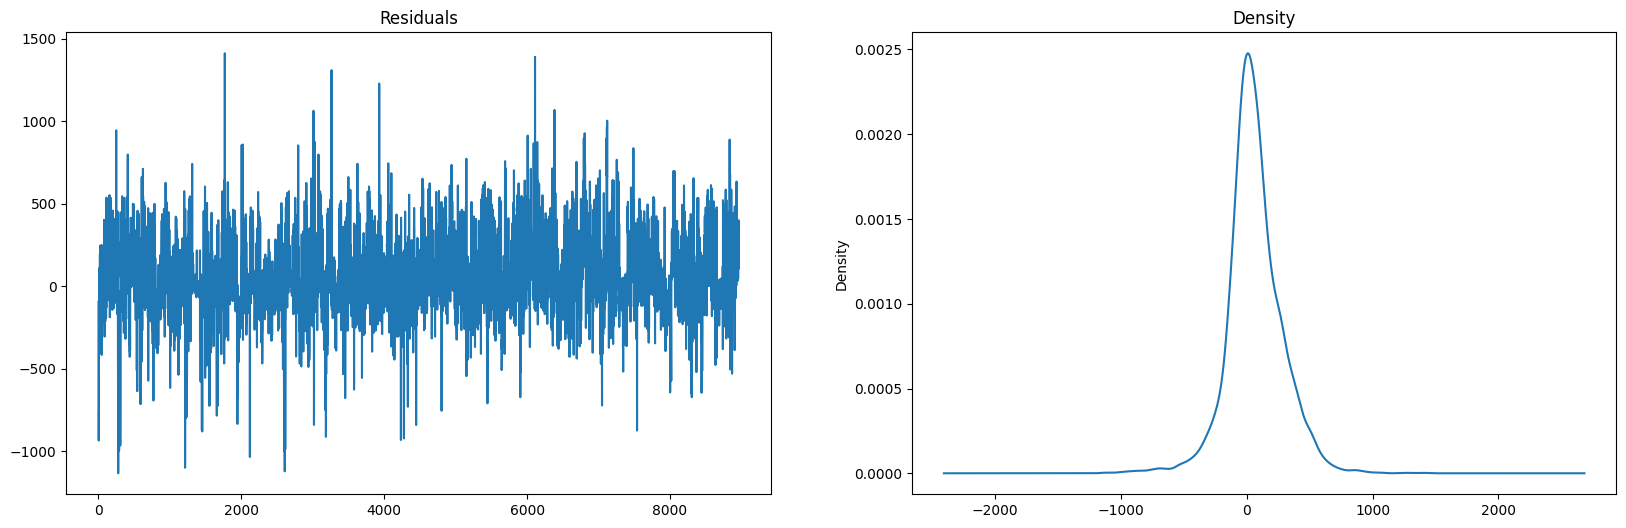

In [ ]:
#residuals = pd.DataFrame({'PredPower':y_pred.ravel(), 'ActualPower':y_test}) #, 'Residual':(y_test- y_pred)
residuals = pd.DataFrame(list(zip(y_test['Power_kW_Mean'], y_pred.ravel(),  (y_test['Power_kW_Mean']- y_pred))),
               columns =['ActualPower', 'PredPower','Residual'])

fig, ax = plt.subplots(1,2, figsize=(20,6))
residuals['Residual'].plot(title="Residuals", ax=ax[0])
residuals['Residual'].plot(kind='kde', title='Density', ax=ax[1])
plt.show()

fig.savefig("residuals.png",dpi=200)
#residuals.to_csv(model_sav_path+run_name+"residuals.csv")
#residuals

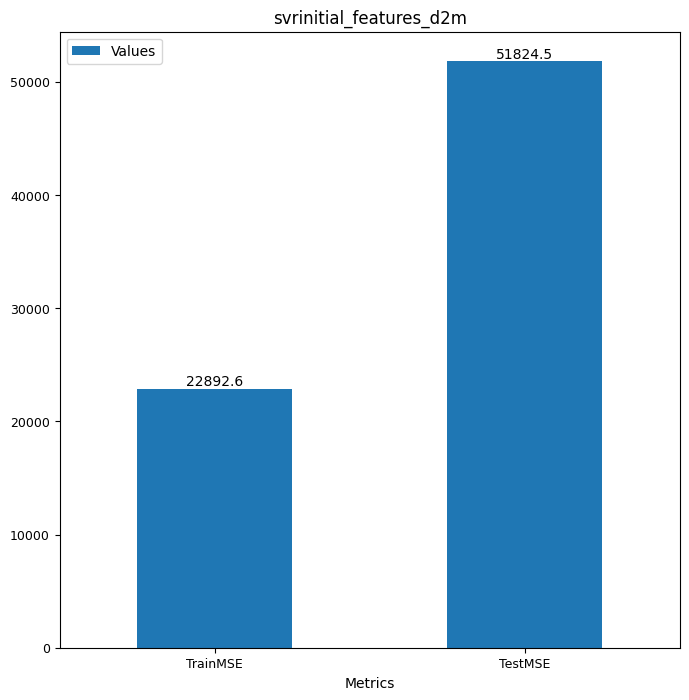

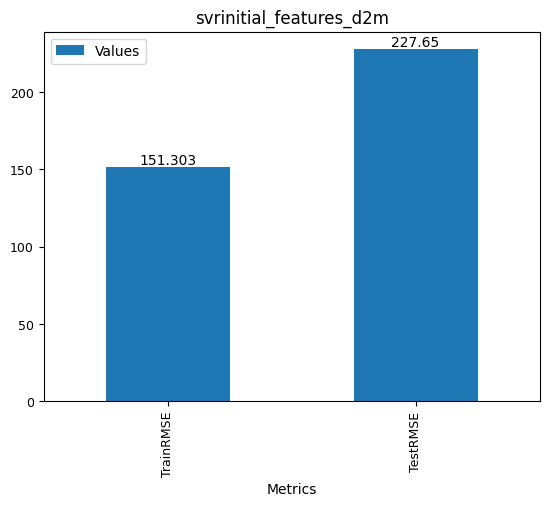

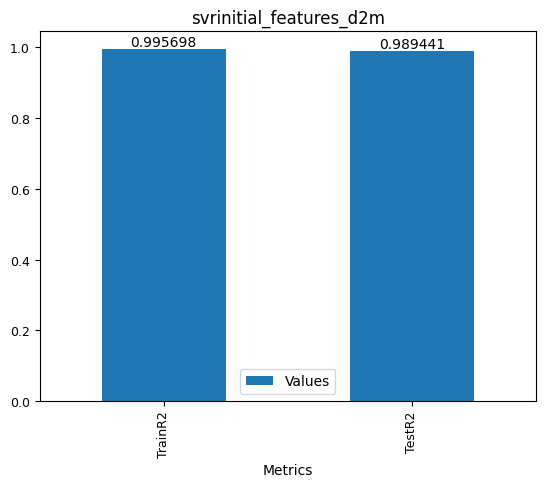

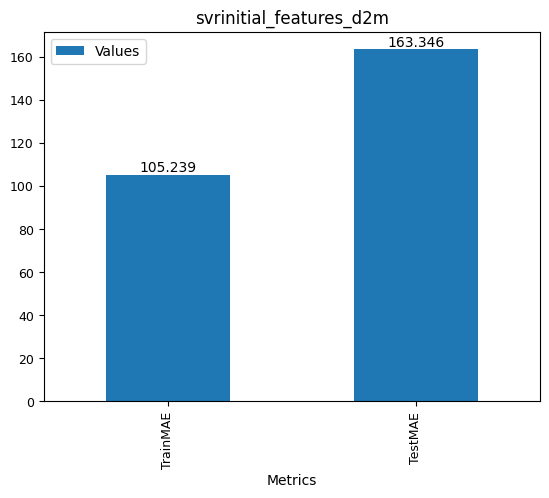

In [ ]:
title = 'svr'+test_type
df = pd.DataFrame({'Metrics': ['TrainMSE', 'TestMSE'], 'Values': [train_mse, mse]})

bargraph = df.plot.bar(x = 'Metrics', y = 'Values', fontsize='9', title=title, figsize=(8,8), rot=0)
bargraph.bar_label(bargraph.containers[0])


fig = bargraph.get_figure()

fig.savefig(title+"_mse_metrics.png")

df = pd.DataFrame({'Metrics': ['TrainRMSE', 'TestRMSE'], 'Values': [train_rmse, rmse]})

bargraph = df.plot.bar(x = 'Metrics', y = 'Values', fontsize='9', title=title)
bargraph.bar_label(bargraph.containers[0])

fig = bargraph.get_figure()
fig.savefig(title+"_rmse_metrics.png")


df = pd.DataFrame({'Metrics': ['TrainR2', 'TestR2'], 'Values': [train_r2, rsquared]})

bargraph = df.plot.bar(x = 'Metrics', y = 'Values', fontsize='9', title=title)
bargraph.bar_label(bargraph.containers[0])

fig = bargraph.get_figure()
fig.savefig(title+"_r2_metrics.png")


df = pd.DataFrame({'Metrics': ['TrainMAE', 'TestMAE'], 'Values': [train_mae, mae]})

bargraph = df.plot.bar(x = 'Metrics', y = 'Values', fontsize='9', title=title)
bargraph.bar_label(bargraph.containers[0])

fig = bargraph.get_figure()
fig.savefig(title+"_mae_metrics.png")

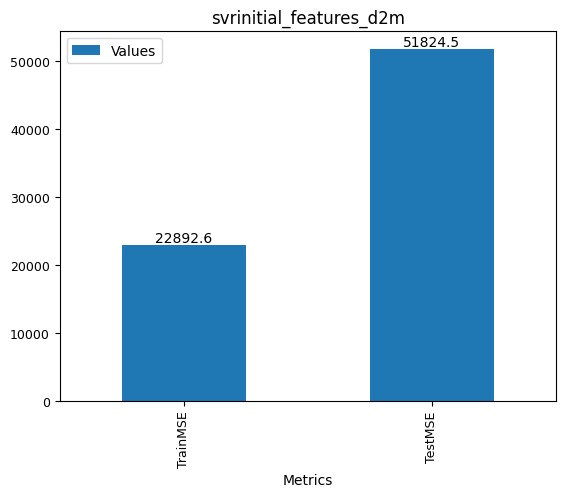

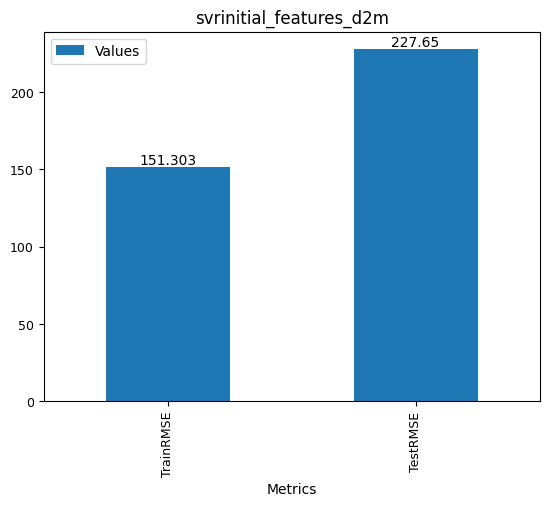

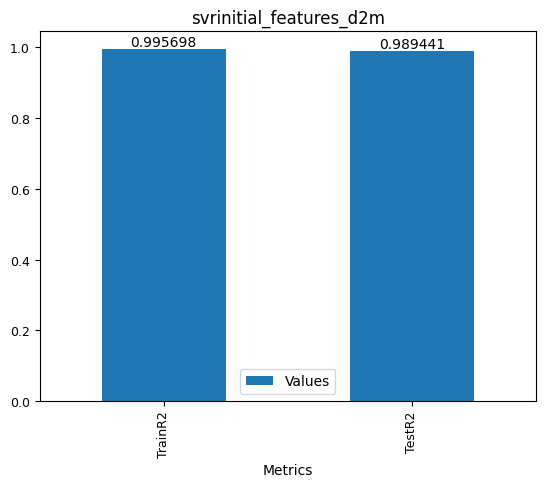

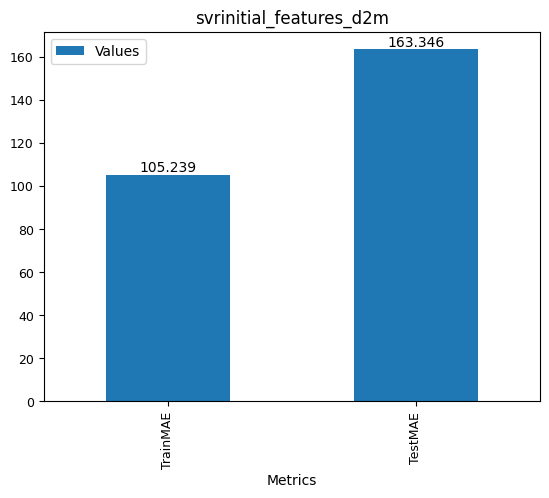

In [ ]:
title = 'svr'+test_type
df = pd.DataFrame({'Metrics': ['TrainMSE', 'TestMSE'], 'Values': [train_mse, mse]})

bargraph = df.plot.bar(x = 'Metrics', y = 'Values', fontsize='9', title=title)
bargraph.bar_label(bargraph.containers[0])


fig = bargraph.get_figure()
fig.savefig(title+"_mse_metrics.png")

df = pd.DataFrame({'Metrics': ['TrainRMSE', 'TestRMSE'], 'Values': [train_rmse, rmse]})

bargraph = df.plot.bar(x = 'Metrics', y = 'Values', fontsize='9', title=title)
bargraph.bar_label(bargraph.containers[0])

fig = bargraph.get_figure()
fig.savefig(title+"_rmse_metrics.png")


df = pd.DataFrame({'Metrics': ['TrainR2', 'TestR2'], 'Values': [train_r2, rsquared]})

bargraph = df.plot.bar(x = 'Metrics', y = 'Values', fontsize='9', title=title)
bargraph.bar_label(bargraph.containers[0])

fig = bargraph.get_figure()
fig.savefig(title+"_r2_metrics.png")


df = pd.DataFrame({'Metrics': ['TrainMAE', 'TestMAE'], 'Values': [train_mae, mae]})

bargraph = df.plot.bar(x = 'Metrics', y = 'Values', fontsize='9', title=title)
bargraph.bar_label(bargraph.containers[0])

fig = bargraph.get_figure()
fig.savefig(title+"_mae_metrics.png")

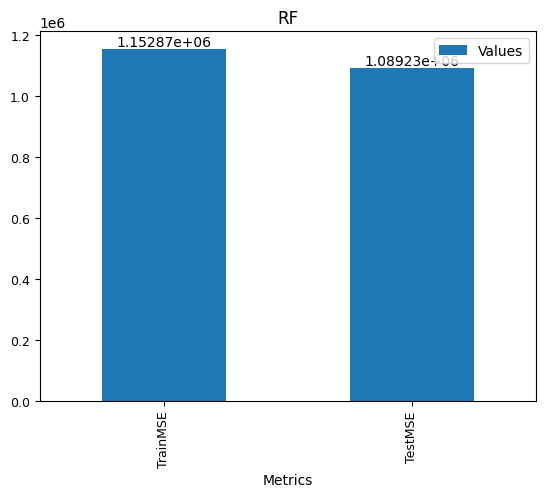

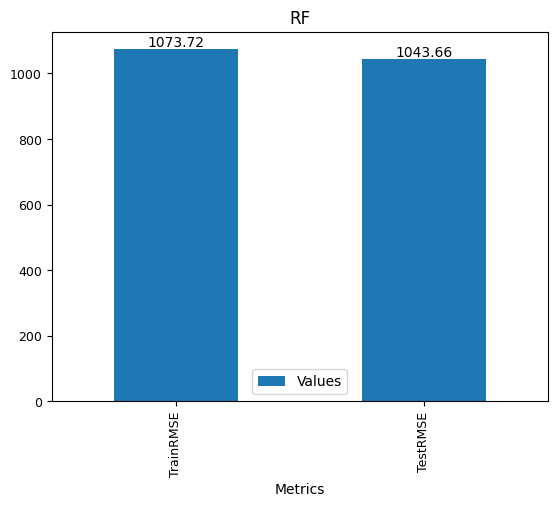

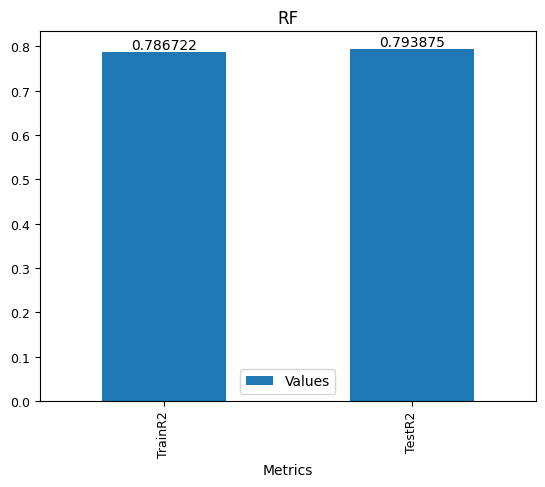

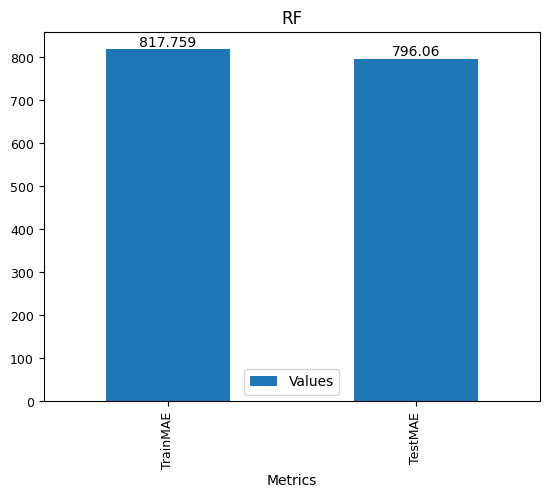

In [ ]:
title = 'svr'+test_type
df = pd.DataFrame({'Metrics': ['TrainMSE', 'TestMSE'], 'Values': [train_mse, mse]})

bargraph = df.plot.bar(x = 'Metrics', y = 'Values', fontsize='9', title=title)
bargraph.bar_label(bargraph.containers[0])


fig = bargraph.get_figure()
fig.savefig(title+"_mse_metrics.png")

df = pd.DataFrame({'Metrics': ['TrainRMSE', 'TestRMSE'], 'Values': [train_rmse, rmse]})

bargraph = df.plot.bar(x = 'Metrics', y = 'Values', fontsize='9', title=title)
bargraph.bar_label(bargraph.containers[0])

fig = bargraph.get_figure()
fig.savefig(title+"_rmse_metrics.png")


df = pd.DataFrame({'Metrics': ['TrainR2', 'TestR2'], 'Values': [train_r2, rsquared]})

bargraph = df.plot.bar(x = 'Metrics', y = 'Values', fontsize='9', title=title)
bargraph.bar_label(bargraph.containers[0])

fig = bargraph.get_figure()
fig.savefig(title+"_r2_metrics.png")


df = pd.DataFrame({'Metrics': ['TrainMAE', 'TestMAE'], 'Values': [train_mae, mae]})

bargraph = df.plot.bar(x = 'Metrics', y = 'Values', fontsize='9', title=title)
bargraph.bar_label(bargraph.containers[0])

fig = bargraph.get_figure()
fig.savefig(title+"_mae_metrics.png")

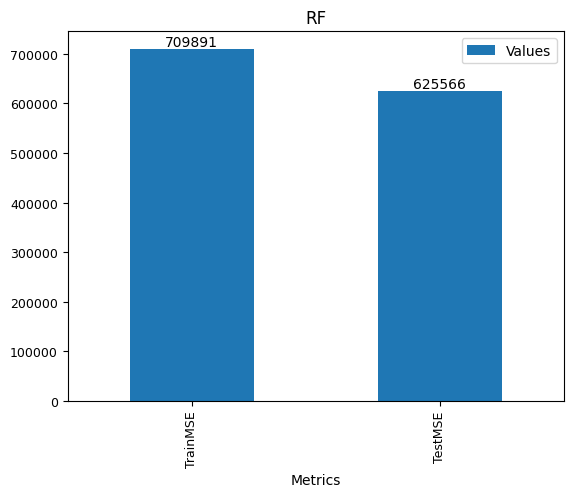

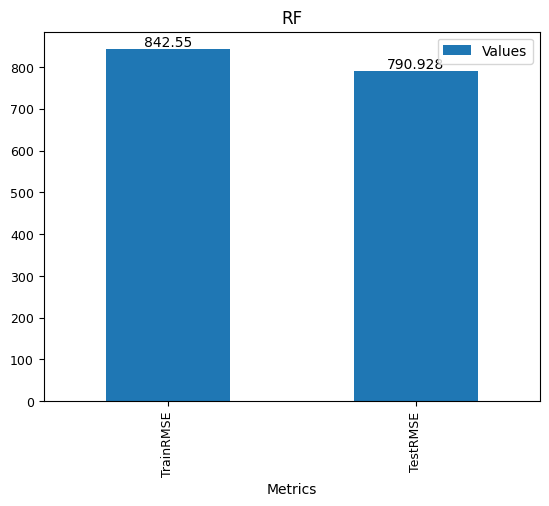

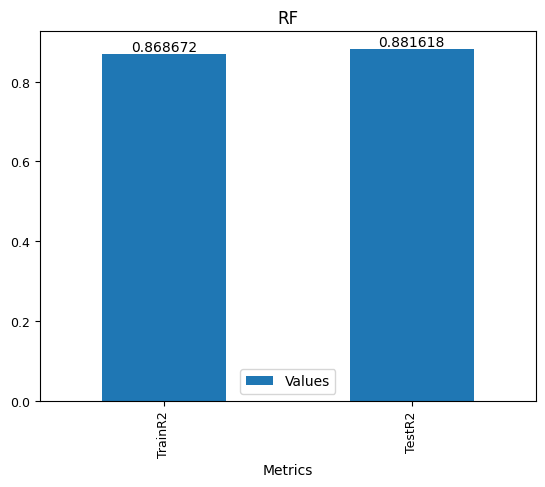

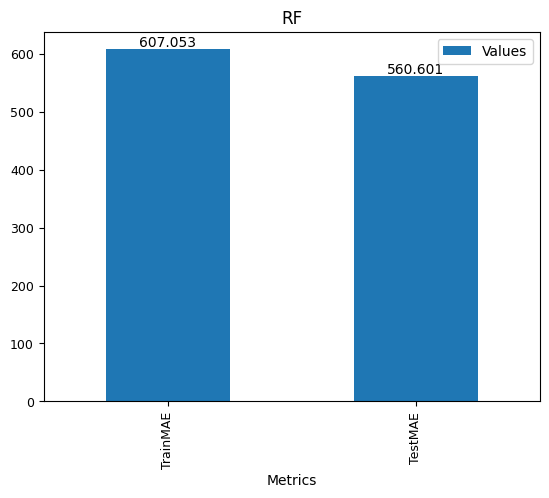

In [ ]:
title = 'svr'+test_type
df = pd.DataFrame({'Metrics': ['TrainMSE', 'TestMSE'], 'Values': [train_mse, mse]})

bargraph = df.plot.bar(x = 'Metrics', y = 'Values', fontsize='9', title=title)
bargraph.bar_label(bargraph.containers[0])


fig = bargraph.get_figure()
fig.savefig(title+"_mse_metrics.png")

df = pd.DataFrame({'Metrics': ['TrainRMSE', 'TestRMSE'], 'Values': [train_rmse, rmse]})

bargraph = df.plot.bar(x = 'Metrics', y = 'Values', fontsize='9', title=title)
bargraph.bar_label(bargraph.containers[0])

fig = bargraph.get_figure()
fig.savefig(title+"_rmse_metrics.png")


df = pd.DataFrame({'Metrics': ['TrainR2', 'TestR2'], 'Values': [train_r2, rsquared]})

bargraph = df.plot.bar(x = 'Metrics', y = 'Values', fontsize='9', title=title)
bargraph.bar_label(bargraph.containers[0])

fig = bargraph.get_figure()
fig.savefig(title+"_r2_metrics.png")


df = pd.DataFrame({'Metrics': ['TrainMAE', 'TestMAE'], 'Values': [train_mae, mae]})

bargraph = df.plot.bar(x = 'Metrics', y = 'Values', fontsize='9', title=title)
bargraph.bar_label(bargraph.containers[0])

fig = bargraph.get_figure()
fig.savefig(title+"_mae_metrics.png")

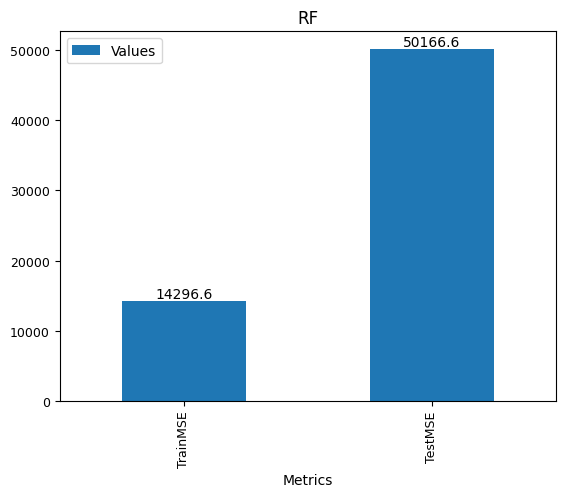

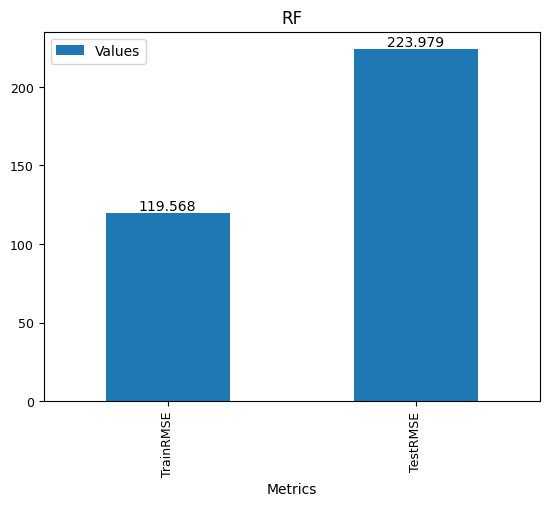

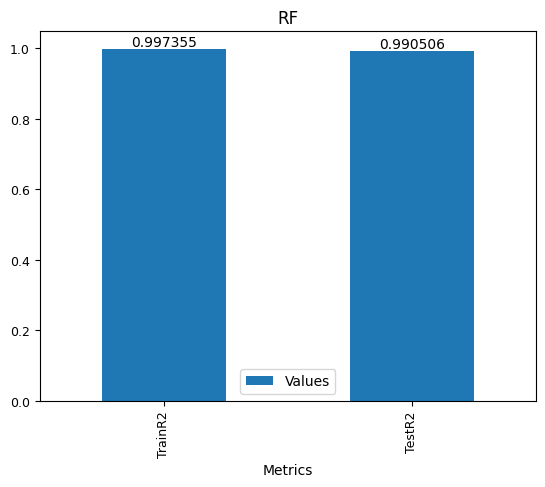

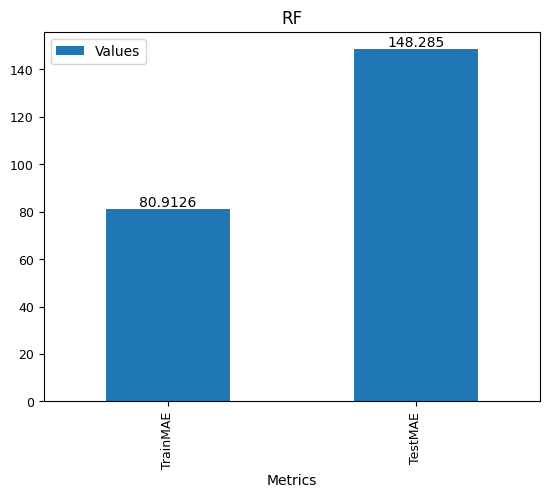

In [ ]:
title ='RF'
df = pd.DataFrame({'Metrics': ['TrainMSE', 'TestMSE'], 'Values': [train_mse, mse]})

bargraph = df.plot.bar(x = 'Metrics', y = 'Values', fontsize='9', title=title)
bargraph.bar_label(bargraph.containers[0])


fig = bargraph.get_figure()
fig.savefig(title+"_mse_metrics.png")

df = pd.DataFrame({'Metrics': ['TrainRMSE', 'TestRMSE'], 'Values': [train_rmse, rmse]})

bargraph = df.plot.bar(x = 'Metrics', y = 'Values', fontsize='9', title=title)
bargraph.bar_label(bargraph.containers[0])

fig = bargraph.get_figure()
fig.savefig(title+"_rmse_metrics.png")


df = pd.DataFrame({'Metrics': ['TrainR2', 'TestR2'], 'Values': [train_r2, rsquared]})

bargraph = df.plot.bar(x = 'Metrics', y = 'Values', fontsize='9', title=title)
bargraph.bar_label(bargraph.containers[0])

fig = bargraph.get_figure()
fig.savefig(title+"_r2_metrics.png")


df = pd.DataFrame({'Metrics': ['TrainMAE', 'TestMAE'], 'Values': [train_mae, mae]})

bargraph = df.plot.bar(x = 'Metrics', y = 'Values', fontsize='9', title=title)
bargraph.bar_label(bargraph.containers[0])

fig = bargraph.get_figure()
fig.savefig(title+"_mae_metrics.png")

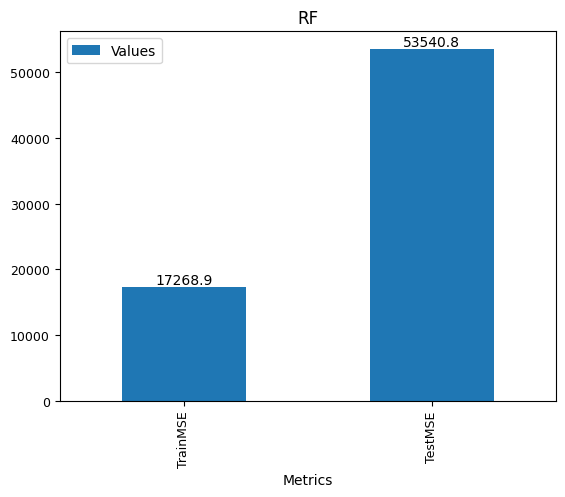

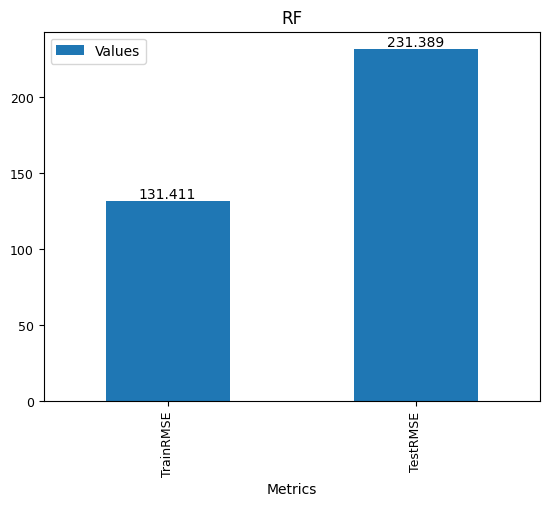

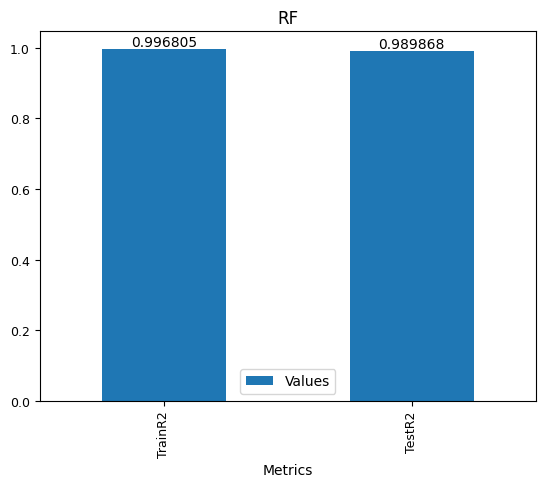

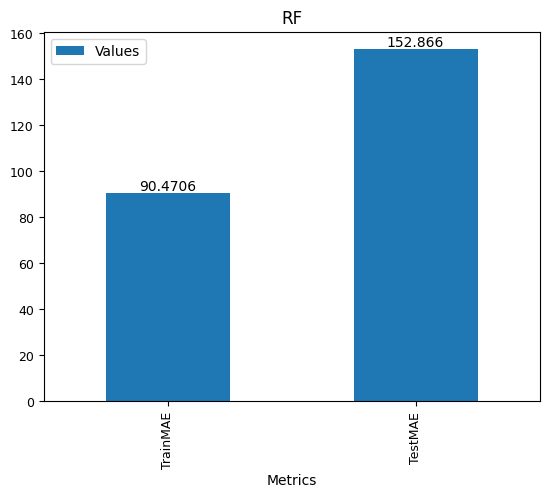

In [ ]:
title ='RF'
df = pd.DataFrame({'Metrics': ['TrainMSE', 'TestMSE'], 'Values': [train_mse, mse]})

bargraph = df.plot.bar(x = 'Metrics', y = 'Values', fontsize='9', title=title)
bargraph.bar_label(bargraph.containers[0])


fig = bargraph.get_figure()
fig.savefig(title+"_mse_metrics.png")

df = pd.DataFrame({'Metrics': ['TrainRMSE', 'TestRMSE'], 'Values': [train_rmse, rmse]})

bargraph = df.plot.bar(x = 'Metrics', y = 'Values', fontsize='9', title=title)
bargraph.bar_label(bargraph.containers[0])

fig = bargraph.get_figure()
fig.savefig(title+"_rmse_metrics.png")


df = pd.DataFrame({'Metrics': ['TrainR2', 'TestR2'], 'Values': [train_r2, rsquared]})

bargraph = df.plot.bar(x = 'Metrics', y = 'Values', fontsize='9', title=title)
bargraph.bar_label(bargraph.containers[0])

fig = bargraph.get_figure()
fig.savefig(title+"_r2_metrics.png")


df = pd.DataFrame({'Metrics': ['TrainMAE', 'TestMAE'], 'Values': [train_mae, mae]})

bargraph = df.plot.bar(x = 'Metrics', y = 'Values', fontsize='9', title=title)
bargraph.bar_label(bargraph.containers[0])

fig = bargraph.get_figure()
fig.savefig(title+"_mae_metrics.png")

In [ ]:
for obj in temp_test_arr:
  i = 1
  obj.predicted_y = modelFit.predict(X_test)

  obj.mse = mean_squared_error(obj.y_test, obj.predicted_y)
  obj.rmse = np.sqrt(mean_squared_error(obj.y_test, obj.predicted_y))
  obj.rsquared =  r2_score(obj.y_test, obj.predicted_y)
  obj.mae = mean_absolute_error(obj.y_test, obj.predicted_y)
  obj.test_type = testcase_obj.get('test_type')
  ts =  i#time.mktime(datetime.datetime.strptime(obj.start, "%y/%m/%d").timetuple())

  mlflow.log_metric(key="mse", value=obj.mse, step=ts)
  mlflow.log_metric(key="rmse", value=obj.rmse, step=ts)
  mlflow.log_metric(key="rsquared", value=obj.rsquared, step=ts)
  mlflow.log_metric(key="mae", value=obj.mae, step=ts)
  #mlflow.log_metric(key="test_type", value=obj.test_type, step=ts)
  i = i +1
#metrics = mlflow.sklearn.eval_and_log_metrics(modelObj.modelFit, X_test_scaled, y_test_scaled, prefix="val_")


In [ ]:
prediction_df = pd.DataFrame([vars(t) for t in temp_test_arr])
prediction_df[['start','end','mse','rmse','mae','rsquared','test_type']]
prediction_df["start"] = pd.to_datetime(prediction_df["start"])
prediction_df["end"] = pd.to_datetime(prediction_df["end"])


In [ ]:
prediction_df

start                 end  \
0 2021-01-01 2021-01-01 23:55:00   
1 2021-01-02 2021-01-02 23:55:00   
2 2021-01-03 2021-01-03 23:55:00   
3 2021-01-04 2021-01-04 23:55:00   
4 2021-01-05 2021-01-05 23:55:00   

                                              X_test  \
0          Pitch_Deg_Mean  Pitch_Deg_Stdev  Anemo...   
1          Pitch_Deg_Mean  Pitch_Deg_Stdev  Anemo...   
2          Pitch_Deg_Mean  Pitch_Deg_Stdev  Anemo...   
3          Pitch_Deg_Mean  Pitch_Deg_Stdev  Anemo...   
4          Pitch_Deg_Mean  Pitch_Deg_Stdev  Anemo...   

                                              y_test  \
0          Power_kW_Mean
205662    4249.639794
20...   
1          Power_kW_Mean
205806    1241.199313
20...   
2          Power_kW_Mean
205950    4317.611301
20...   
3          Power_kW_Mean
206094    3905.993139
20...   
4          Power_kW_Mean
206238    6572.166381
20...   

                                       X_test_scaled  \
0  [[0.0934467177609242, 0.0007056794741089021, 0...   
1  [[0.09124985304528807, 9.620259653664817e-08, ...   
2  [[0.09382292246015235, 0.0003276457447118143, ...   
3  [[0.09287234313322017, 0.0013459141078785044, ...   
4  [[0.10571722753393095, 0.0010674620256627323, ...   

                                       y_test_scaled  \
0  [0.5944349997358295, 0.5876104415454417, 0.489...   
1  [0.17361744363889992, 0.17096166594233592, 0.1...   
2  [0.6039427841580932, 0.5514007460212613, 0.559...   
3  [0.5463660595301154, 0.38775789640926306, 0.30...   
4  [0.9193076266590704, 0.9492637221333333, 0.953...   

                                           test_time predicted_values  \
0  205662   2021-01-01 00:10:00
205663   2021-01-...             None   
1  205806   2021-01-02 00:10:00
205807   2021-01-...             None   
2  205950   2021-01-03 00:10:00
205951   2021-01-...             None   
3  206094   2021-01-04 00:10:00
206095   2021-01-...             None   
4  206238   2021-01-05 00:10:00
206239   2021-01-...             None   

                                       y_pred_scaled  \
0  [0.5930159050978046, 0.5897967073615249, 0.503...   
1  [0.18723884590781012, 0.15806292664427674, 0.1...   
2  [0.6064871487255536, 0.5523590946089705, 0.559...   
3  [0.5237280804735456, 0.38459352412223535, 0.24...   
4  [0.900169200103584, 0.9483785436732143, 0.9531...   

                                         predicted_y           mse  \
0  [[4239.494633410918], [4216.480468133565], [35...  52317.172761   
1  [[1338.5792280872047], [1129.9994877119957], [...  38109.252467   
2  [[4335.801059029496], [3948.8375713438336], [3...  70684.549145   
3  [[3744.1533781533894], [2749.4752198117344], [...  34519.812877   
4  [[6435.345052004951], [6779.995456147692], [68...  54952.441661   

         rmse  rsquared         mae test_type  
0  228.729475  0.975106  172.404958        CS  
1  195.215912  0.973459  155.303754        CS  
2  265.865660  0.964591  200.379627        CS  
3  185.795083  0.988312  114.389802        CS  
4  234.419371  0.972112  180.446880        CS

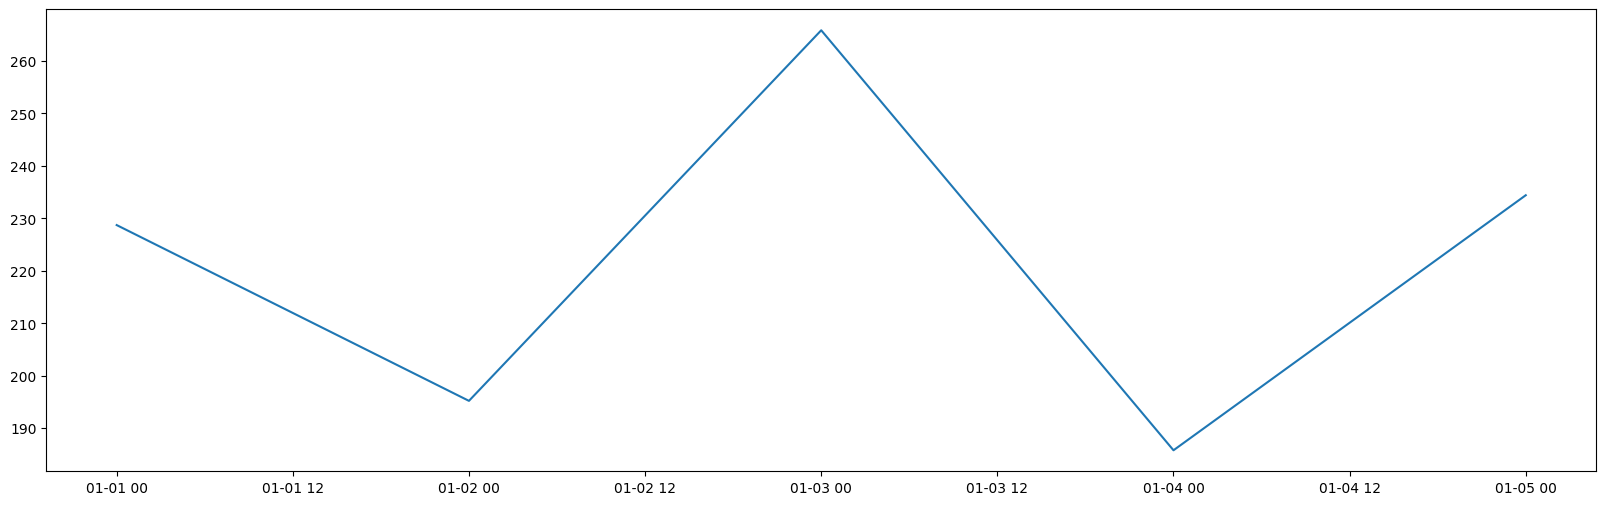

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(prediction_df['start'],prediction_df['rmse'])
#plt.plot(prediction_df['start'],prediction_df['y_test'])

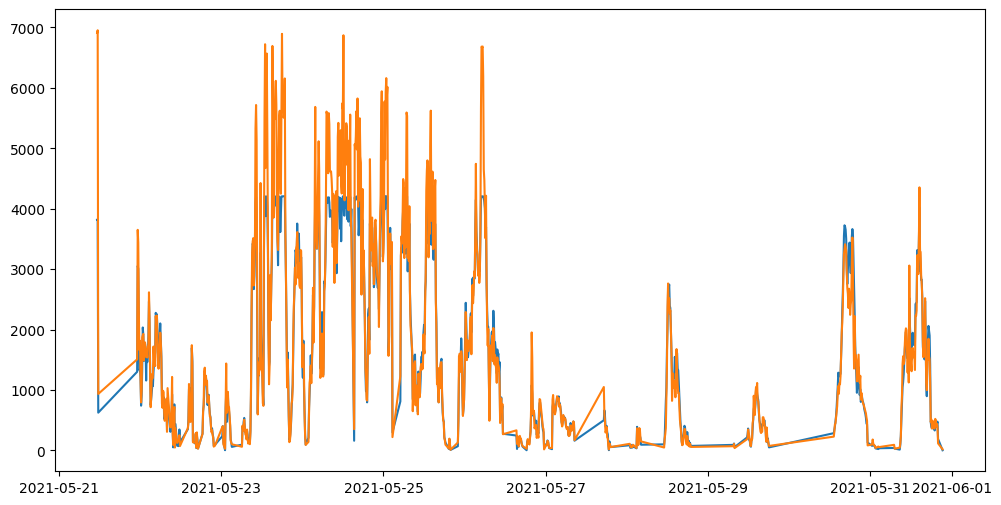

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(test_time, y_test, label ="Actual")
plt.plot(test_time, modelObj.predicted_y, label ="Predictions")
plt.savefig("actual_vs_prediction.png")
mlflow.log_artifact("actual_vs_prediction.png")

# Uncomment the following line to log the confusion matrix to mlflow


In [ ]:
mlflow.end_run()

In [ ]:
with mlflow.start_run() as run:
    # Log the dictionary as a table
    mlflow.log_table(data=dict, artifact_file="test_dictionary.json")
    run_id = run.info.run_id

In [ ]:
prediction_df = pd.DataFrame([vars(t) for t in temp_test_arr])
prediction_df[['start','end','mse','rmse','mae','rsquared','test_type']]

start                  end           mse        rmse  \
0   2021-01-01 00:00:00  2021-01-30 00:00:00  26854.957493  163.874823   
1   2021-02-01 00:00:00  2021-02-28 00:00:00  24431.981043  156.307329   
2   2021-03-01 00:00:00  2021-03-30 00:00:00  15464.437837  124.356093   
3   2021-04-01 00:00:00  2021-04-30 00:00:00  22648.780323  150.495117   
4   2021-05-01 00:00:00  2021-05-30 00:00:00  73034.810627  270.249534   
5   2021-06-01 00:00:00  2021-06-30 00:00:00  20742.964008  144.024179   
6   2021-07-01 00:00:00  2021-07-30 00:00:00  12146.390692  110.210665   
7   2021-08-01 00:00:00  2021-08-30 00:00:00  14396.091512  119.983714   
8   2021-09-01 00:00:00  2021-09-30 00:00:00  16925.625528  130.098522   
9   2021-10-01 00:00:00  2021-10-30 00:00:00  27047.363804  164.460828   
10  2021-11-01 00:00:00  2021-11-30 00:00:00  99556.795977  315.526221   

           mae  rsquared test_type  
0   103.012920  0.994232        CS  
1    74.246397  0.997152        CS  
2    74.987003  0.997476        CS  
3    75.011236  0.991709        CS  
4    79.632770  0.975075        CS  
5    56.449242  0.987607        CS  
6    60.664653  0.986424        CS  
7    53.215861  0.994297        CS  
8    28.104144  0.991214        CS  
9    52.856819  0.991574        CS  
10   61.335425  0.437479        CS

In [ ]:
print(f"Mean Squared Error (MSE) for {modelObj.model_name} {modelObj.test_type}:", modelObj.mse)
print(f"Root Mean Squared Error (RMSE) for {modelObj.model_name} {modelObj.test_type}:",modelObj.rmse)
print(f"R Squared Score for {modelObj.model_name} {modelObj.test_type}:", modelObj.rsquared )

Mean Squared Error (MSE) for RandomForest CS: 282131.7091227443
Root Mean Squared Error (RMSE) for RandomForest CS: 531.160718730917
R Squared Score for RandomForest CS: 0.8823188876784244


array([8.26818645e-02, 9.09458394e-01, 1.53999338e-03, 1.63301987e-03,
       1.54458663e-03, 4.57600521e-04, 8.00113501e-04, 4.34791407e-04,
       7.16348780e-04, 7.33287035e-04])

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(test_time, y_test, label ="Actual")
plt.plot(test_time, modelObj.predicted_y, label ="Predictions")

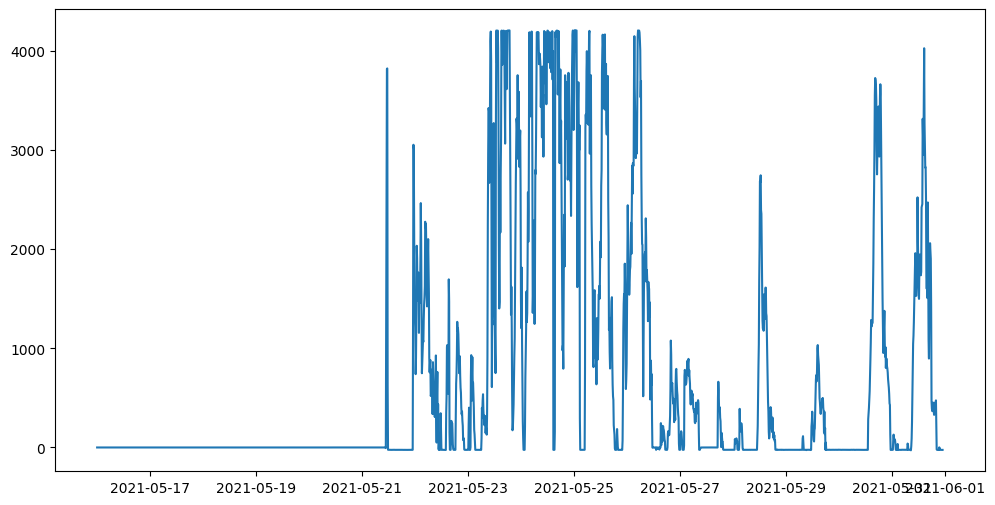

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(test_time, y_test, label ="Actual")

# Power Curve

In [ ]:
from scipy.interpolate import CubicSpline

In [ ]:
temp_df = df_final[(df_final['Power_kW_Mean']>1) & (df_final['Anemo_T_Mean']<18)]


In [ ]:
temp_df = temp_df[(temp_df['StartTime'] > pd.to_datetime('2020-01-01')) & (temp_df['StartTime'] < pd.to_datetime('2020-06-01'))]


In [ ]:
temp_df = temp_df[['Power_kW_Mean','Anemo_T_Mean']]

In [ ]:
temp_df.isna().sum()

Power_kW_Mean    0
Anemo_T_Mean     0
dtype: int64

In [ ]:
temp_df = temp_df.round(1)

In [ ]:
temp_df = temp_df.groupby(temp_df.Anemo_T_Mean)[['Power_kW_Mean']].median() #median

In [ ]:
temp_df.reset_index(inplace=True)

In [ ]:
wind_speed = np.where(temp_df['Anemo_T_Mean'] < 0, 0, temp_df['Anemo_T_Mean'])
power = np.where(temp_df['Power_kW_Mean'] < 0, 0, temp_df['Power_kW_Mean'])

In [ ]:
wind_speed = temp_df['Anemo_T_Mean'].to_numpy()
power = temp_df['Power_kW_Mean'].to_numpy()
#power_kwh = temp_df['TotalExport_kWh_Mean'].to_numpy()

In [ ]:
unique_indices = np.unique(wind_speed, return_index=True)[1]
#wind_speed = np.unique(wind_speed, return_index=True)[0]

wind_speed = wind_speed[unique_indices]
power = power[unique_indices]
#power_kwh = power_kwh[unique_indices]

In [ ]:
index = np.argsort(wind_speed)
sorted_wind = wind_speed[index]
power_sorted = power[index]
#power_kwh_sorted = power_kwh[index]

In [ ]:
step = 100  # downsampling
downsampled_speed = wind_speed[::step]
downsampled_power = power[::step]

In [ ]:
index = np.argsort(downsampled_speed)
sorted_wind = downsampled_speed[index]
power_sorted = downsampled_power[index]

In [ ]:
import pandas as pd
from sklearn.cluster import DBSCAN

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

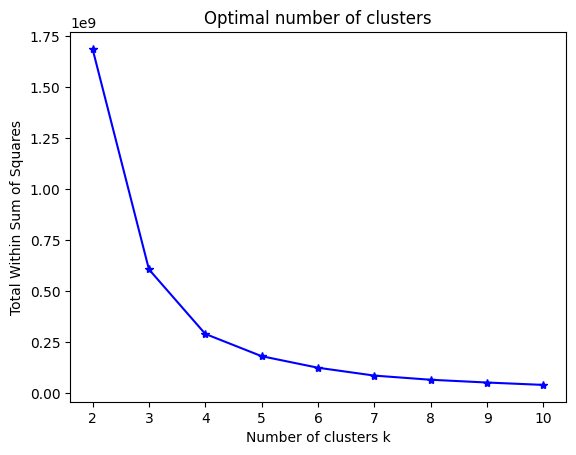

In [ ]:

wss = []

K = range(2,11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans = kmeans.fit(temp_df)
    wss.append(kmeans.inertia_)
plt.plot(K, wss, "b*-")
plt.xlabel("Number of clusters k")
plt.ylabel("Total Within Sum of Squares")
plt.title("Optimal number of clusters")
plt.show()



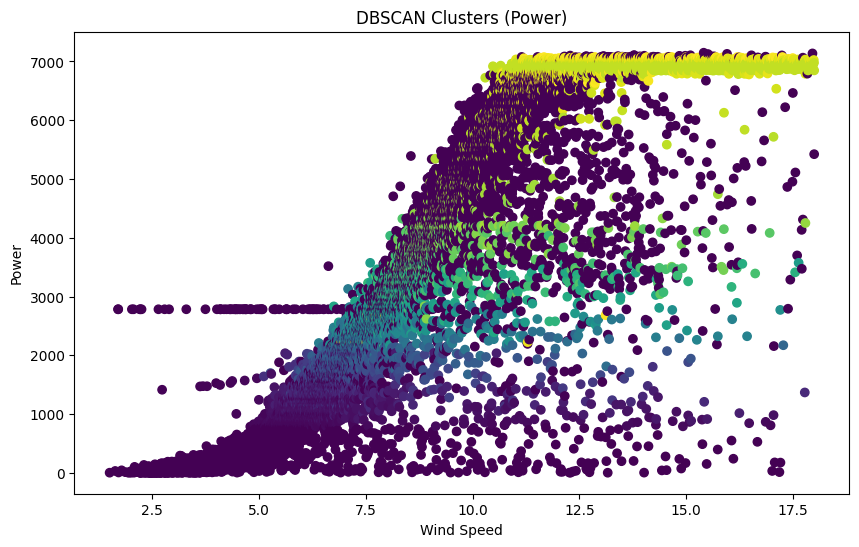

In [ ]:
dbscan_power = DBSCAN(eps=0.8, min_samples=10)

power = temp_df['Power_kW_Mean'].values.reshape(-1, 1)
wind_speed = temp_df['Anemo_T_Mean'].values.reshape(-1, 1)
outlier_labels_power = dbscan_power.fit_predict(power)

# Visualize DBSCAN clusters on power values
plt.figure(figsize=(10, 6))
plt.scatter(wind_speed, power, c=outlier_labels_power, cmap='viridis')
plt.xlabel('Wind Speed')
plt.ylabel('Power')
plt.title('DBSCAN Clusters (Power)')
plt.show()


In [ ]:
outlier_labels_power

array([0, 1, 1, ..., 1, 1, 1])

In [ ]:
filtered_data_dbscan = temp_df[ (outlier_labels_power != -1)] #(outlier_labels_power != 0) &

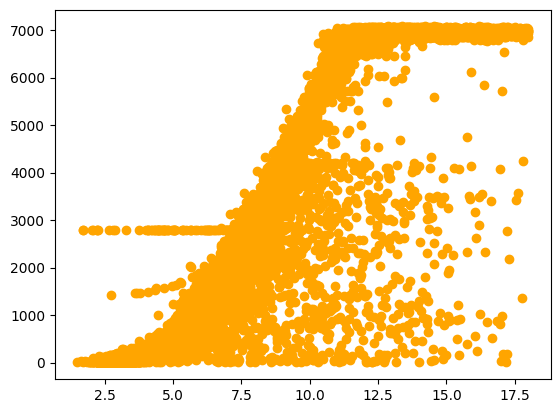

In [ ]:
plt.scatter(filtered_data_dbscan['Anemo_T_Mean'], filtered_data_dbscan['Power_kW_Mean'], c='orange', label='Windspeed/power')


In [ ]:
filtered_data_dbscan = filtered_data_dbscan.groupby(filtered_data_dbscan.Anemo_T_Mean)[['Power_kW_Mean']].median()

In [ ]:
filtered_data_dbscan.reset_index(inplace=True)

In [ ]:
wind_speed = filtered_data_dbscan['Anemo_T_Mean'].to_numpy()
power = filtered_data_dbscan['Power_kW_Mean'].to_numpy()


In [ ]:
wind_speed = temp_df['Anemo_T_Mean'].to_numpy()
power = temp_df['Power_kW_Mean'].to_numpy()


In [ ]:
unique_indices = np.unique(wind_speed, return_index=True)[1]
#wind_speed = np.unique(wind_speed, return_index=True)[0]

wind_speed = wind_speed[unique_indices]
power = power[unique_indices]
#power_kwh = power_kwh[unique_indices]

In [ ]:
index = np.argsort(wind_speed)
sorted_wind = wind_speed[index]
power_sorted = power[index]
#power_kwh_sorted = power_kwh[index]

In [ ]:
sorted_wind

array([ 1.63,  1.7 ,  1.71, ..., 17.95, 17.98, 17.99])

In [ ]:
from sklearn.ensemble import IsolationForest
wind_speed = temp_df['Anemo_T_Mean'].values.reshape(-1, 1)
power = temp_df['Power_kW_Mean'].values.reshape(-1, 1)

data = np.concatenate((wind_speed, power),axis=1)

isolation_forest = IsolationForest(contamination=0.1)
outliers = isolation_forest.fit_predict(data)


non_outliers = data[outliers != -1]
clean_wind_speed = non_outliers[:, 0]
clean_power = non_outliers[:, 1]



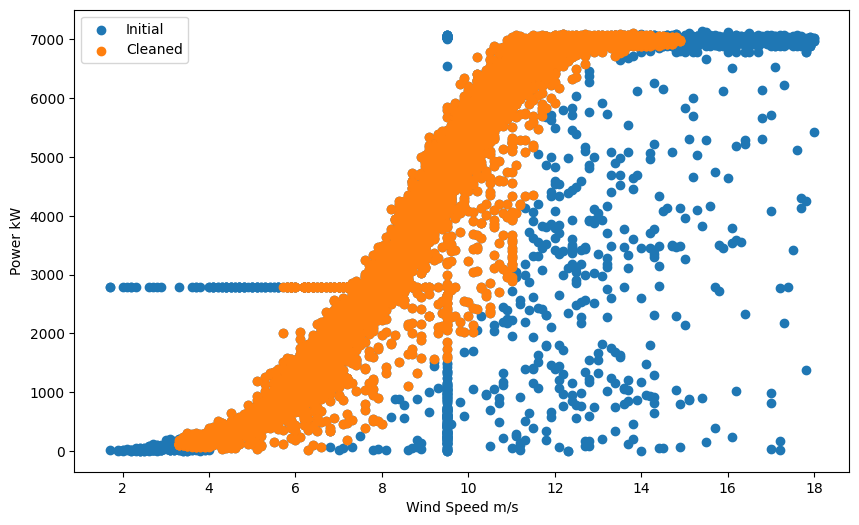

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(wind_speed, power, label='Initial')
plt.scatter(clean_wind_speed, clean_power, label='Cleaned')
plt.xlabel('Wind Speed m/s')
plt.ylabel('Power kW')
plt.legend()
plt.show()


In [ ]:
clean_power

array([1404.9983,  585.8435,  905.8367, ...,   18.6969,   27.3065,
         60.0017])

In [ ]:
temp = {'Power_kW_Mean':clean_power, 'Anemo_T_Mean':clean_wind_speed}
temp  = pd.DataFrame(temp)

In [ ]:
temp = temp.groupby(temp.Anemo_T_Mean)[['Power_kW_Mean']].median()

In [ ]:
temp.reset_index(inplace=True)

In [ ]:
clean_wind_speed_med= temp['Anemo_T_Mean'].to_numpy()
clean_power_med = temp['Power_kW_Mean'].to_numpy()

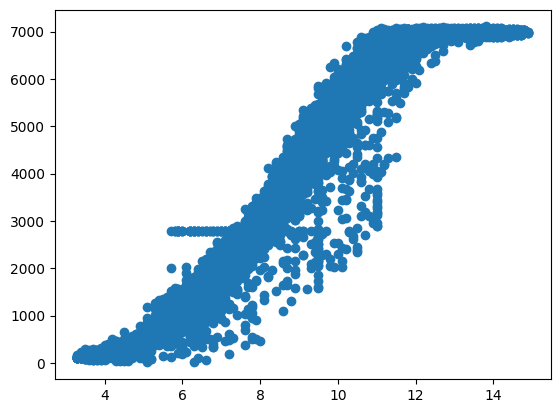

In [ ]:
plt.scatter(clean_wind_speed, clean_power, label='Initial')

In [ ]:
index = np.argsort(clean_wind_speed_med)
sorted_wind = clean_wind_speed_med[index]
power_sorted = clean_power_med[index]

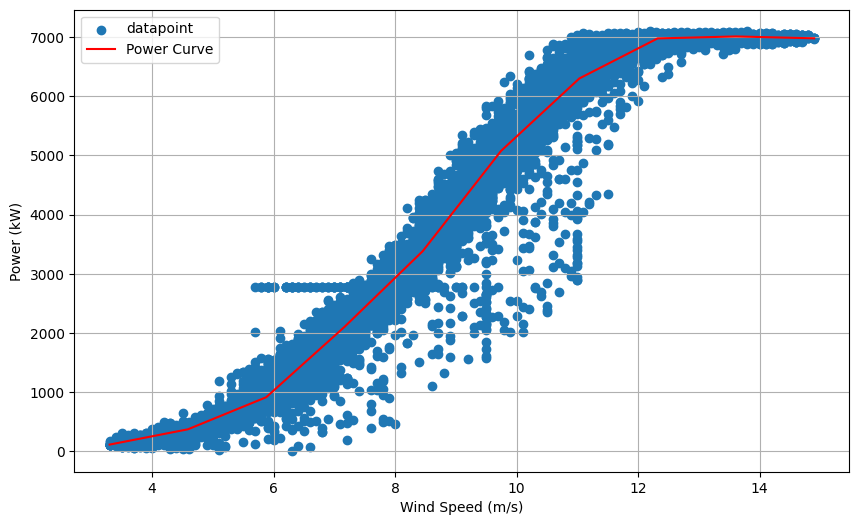

In [ ]:
cs = CubicSpline(sorted_wind, power_sorted)

#wind speed for smooth curve
x = np.linspace(min(sorted_wind), max(sorted_wind), num=10)

# cubic spline interpolation
y = cs(x)

# power curve
plt.figure(figsize=(10, 6))
#plt.plot(sorted_wind, power_sorted, 'bo', markersize=4, label='datapoint') #go
plt.scatter(clean_wind_speed, clean_power, label='datapoint')
plt.plot(x, y, 'r-', label='Power Curve') #r- red line
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Power (kW)')
plt.legend()
plt.grid(True)
plt.show()

ValueError: ignored

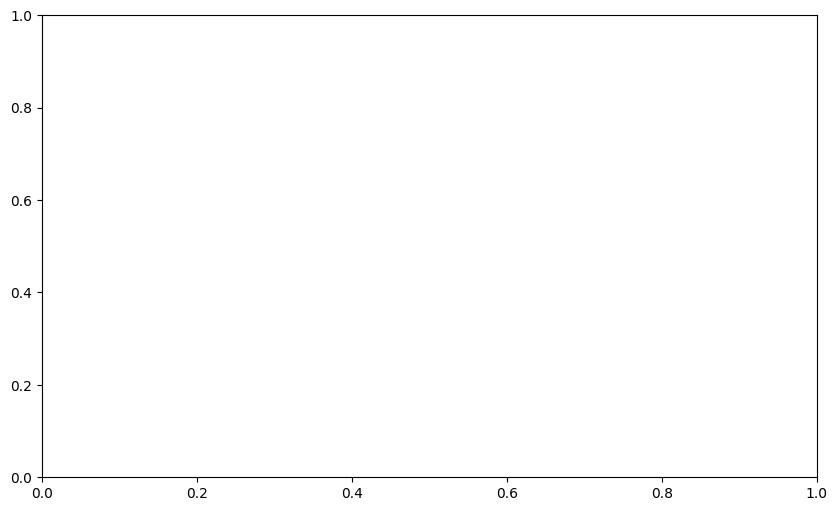

In [ ]:
dbscan_power = DBSCAN(eps=0.6, min_samples=10)

power = temp['Power_kW_Mean'].values.reshape(-1, 1)
wind_speed = temp['Anemo_T_Mean'].values.reshape(-1, 1)
outlier_labels_power = dbscan_power.fit_predict(power)

# Visualize DBSCAN clusters on power values
plt.figure(figsize=(10, 6))
plt.scatter(wind_speed, power, c=outlier_labels_power, cmap='viridis')
plt.xlabel('Wind Speed')
plt.ylabel('Power')
plt.title('DBSCAN Clusters (Power)')
plt.show()


In [ ]:
filtered_data_dbscan = temp[ (outlier_labels_power != -1)] #(outlier_labels_power != 0) &

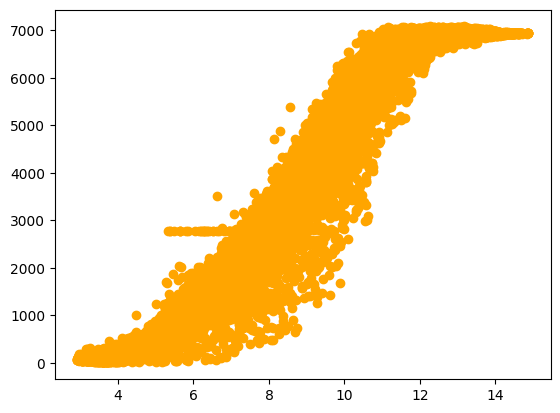

In [ ]:
plt.scatter(filtered_data_dbscan['Anemo_T_Mean'], filtered_data_dbscan['Power_kW_Mean'], c='orange', label='Windspeed/power')


In [ ]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(temp_df[['Power_kW_Mean', 'Anemo_T_Mean']])
distances, indices = nbrs.kneighbors(temp_df[['Power_kW_Mean', 'Anemo_T_Mean']])

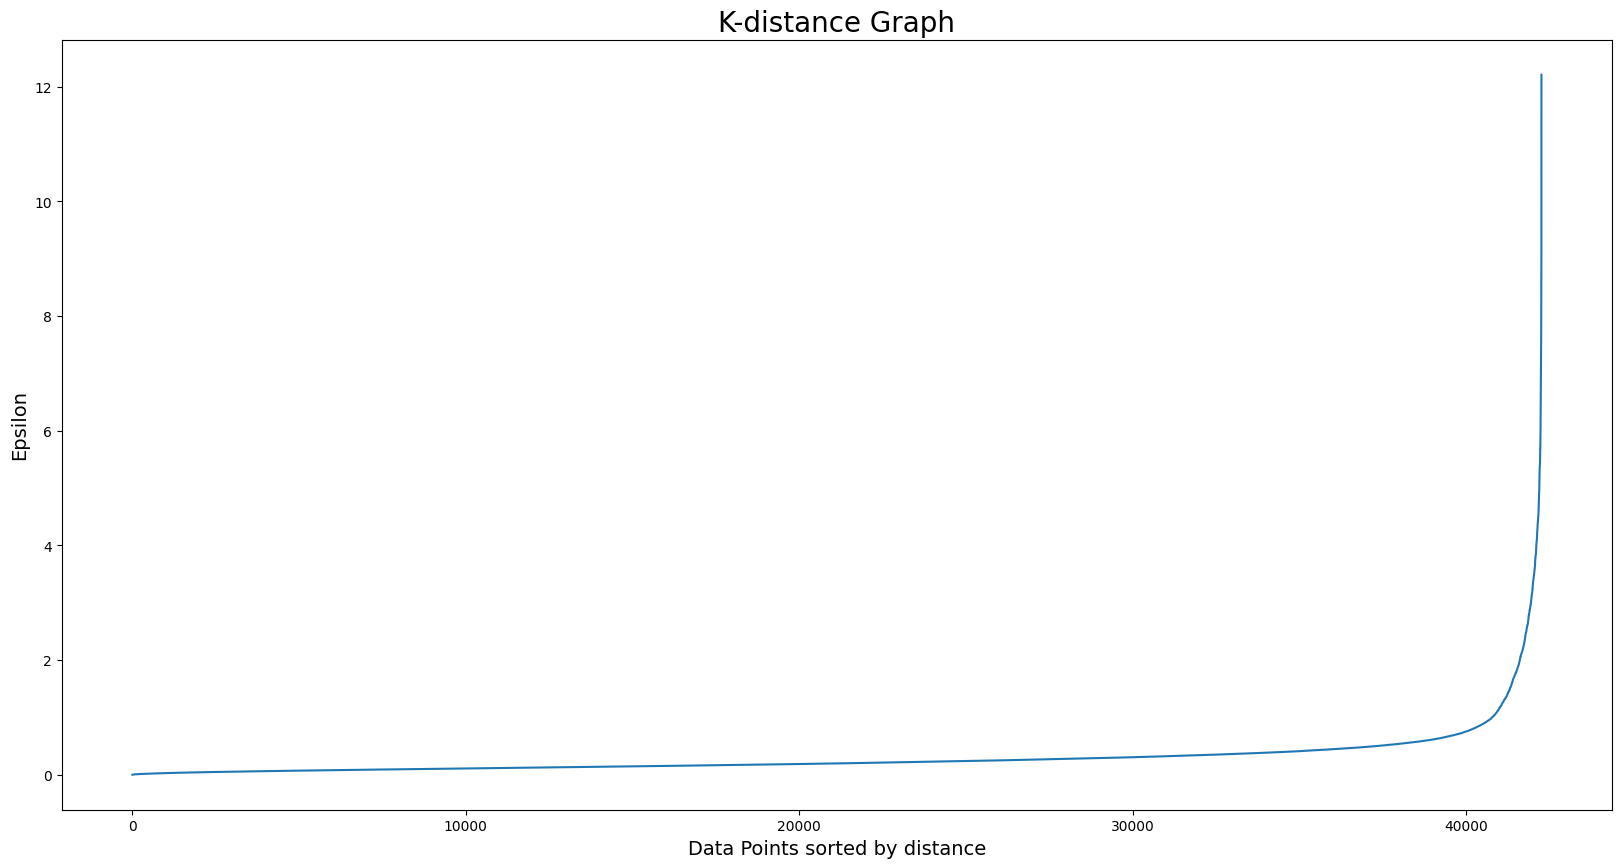

In [ ]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

# Datasetdistribution

(array([7933., 5729., 4086., 3616., 2922., 2592., 2220., 2011., 1946.,
        5527.]),
 array([1.70068027e-03, 7.14905449e+02, 1.42980920e+03, 2.14471295e+03,
        2.85961669e+03, 3.57452044e+03, 4.28942419e+03, 5.00432794e+03,
        5.71923169e+03, 6.43413543e+03, 7.14903918e+03]),
 <BarContainer object of 10 artists>)

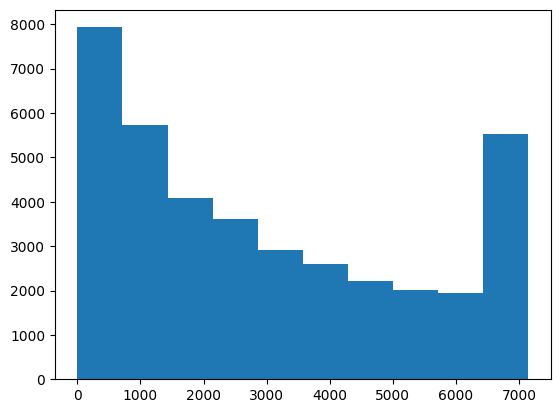

In [ ]:
temp = df_final[(df_final['StartTime'] > pd.to_datetime('2019-11-01')) & (df_final['StartTime'] < pd.to_datetime('2020-12-31'))]
plt.hist(temp['Power_kW_Mean'])


(array([23040.,  6870.,  1006.,   533.,   354.,   223.,   203.,   152.,
          101.,   247.]),
 array([-9.15763221,  0.70176501, 10.56116223, 20.42055945, 30.27995667,
        40.13935389, 49.99875111, 59.85814834, 69.71754556, 79.57694278,
        89.43634   ]),
 <BarContainer object of 10 artists>)

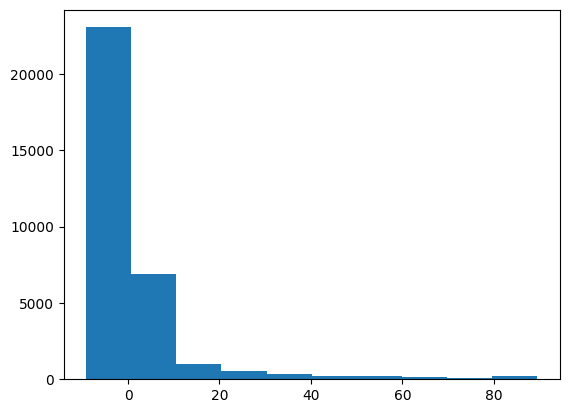

In [ ]:
plt.hist(temp['Pitch_Deg_Mean'])


(array([  883.,  5924., 10143.,  7861.,  4671.,  1980.,   729.,   367.,
          127.,    44.]),
 array([ 1.1304719 ,  3.35784258,  5.58521326,  7.81258394, 10.03995462,
        12.26732529, 14.49469597, 16.72206665, 18.94943733, 21.17680801,
        23.40417869]),
 <BarContainer object of 10 artists>)

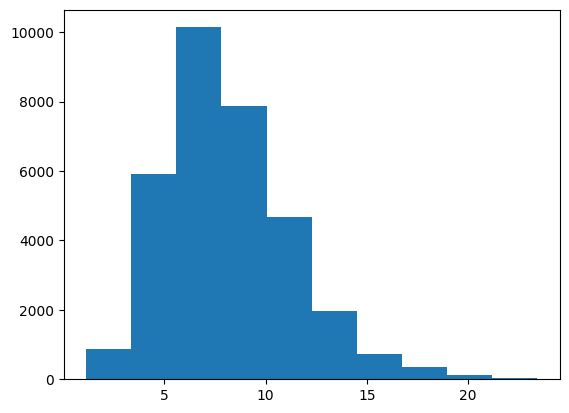

In [ ]:
plt.hist(temp['Anemo_T_Mean'])


(array([ 2021.,  3146.,  3193.,  1394.,  1119.,  2937., 10783.,  4789.,
         2004.,  1343.]),
 array([6.01646325e-02, 3.60452917e+01, 7.20304188e+01, 1.08015546e+02,
        1.44000673e+02, 1.79985800e+02, 2.15970927e+02, 2.51956054e+02,
        2.87941181e+02, 3.23926308e+02, 3.59911435e+02]),
 <BarContainer object of 10 artists>)

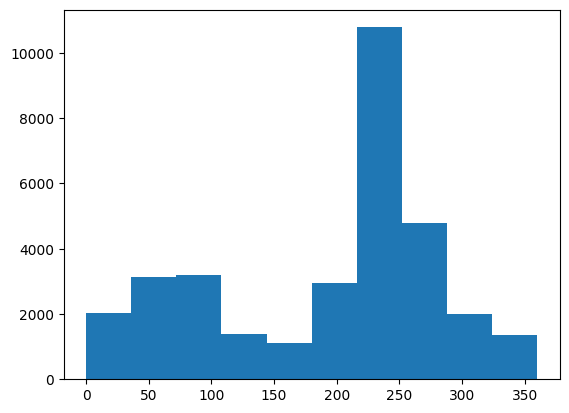

In [ ]:
plt.hist(temp['WindVane_T_Mean'])


(array([ 436., 4000., 6148., 6076., 4773., 5380., 3745., 1713.,  410.,
          48.]),
 array([ 1.55783783,  3.77435288,  5.99086792,  8.20738297, 10.42389802,
        12.64041306, 14.85692811, 17.07344316, 19.2899582 , 21.50647325,
        23.7229883 ]),
 <BarContainer object of 10 artists>)

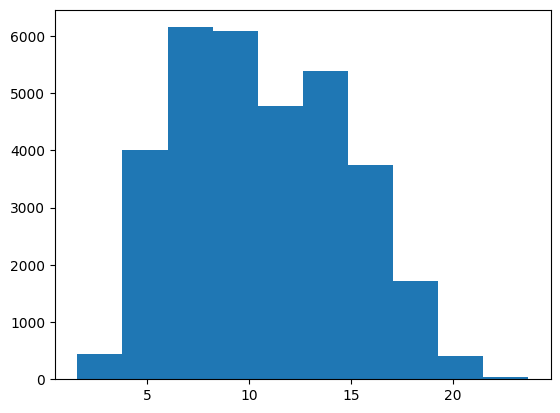

In [ ]:
plt.hist(temp['temp_T_Mean'])


(array([ 129.,  717.,  967., 3380., 5269., 6754., 9286., 4695., 1122.,
         381.]),
 array([ 954.48316269,  963.21829966,  971.95343664,  980.68857361,
         989.42371058,  998.15884756, 1006.89398453, 1015.6291215 ,
        1024.36425848, 1033.09939545, 1041.83453242]),
 <BarContainer object of 10 artists>)

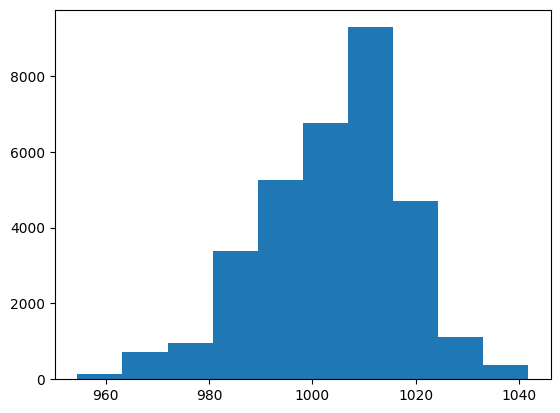

In [ ]:
plt.hist(temp['Barmoeter_1_Mean'])


(array([1.8000e+02, 1.7800e+02, 3.5700e+02, 9.7600e+02, 3.0975e+04,
        3.0000e+00, 6.0000e+00, 5.0000e+00, 4.8000e+01, 1.0000e+00]),
 array([ 3. ,  9.2, 15.4, 21.6, 27.8, 34. , 40.2, 46.4, 52.6, 58.8, 65. ]),
 <BarContainer object of 10 artists>)

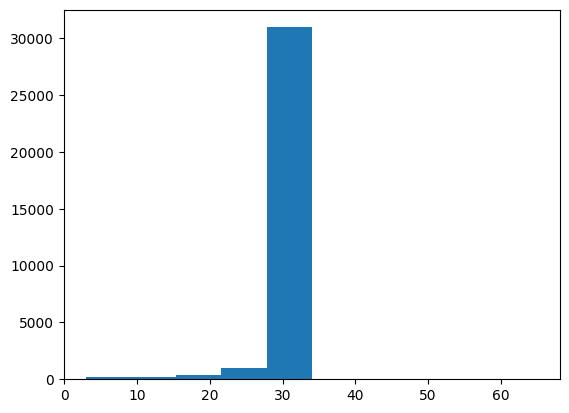

In [ ]:
plt.hist(temp['CtrlrState_Mean'])

(array([6751., 3858., 2266., 1704., 1363., 1241.,  877.,  715.,  731.,
        2553.]),
 array([5.32646048e-02, 7.13757527e+02, 1.42746179e+03, 2.14116605e+03,
        2.85487031e+03, 3.56857458e+03, 4.28227884e+03, 4.99598310e+03,
        5.70968737e+03, 6.42339163e+03, 7.13709589e+03]),
 <BarContainer object of 10 artists>)

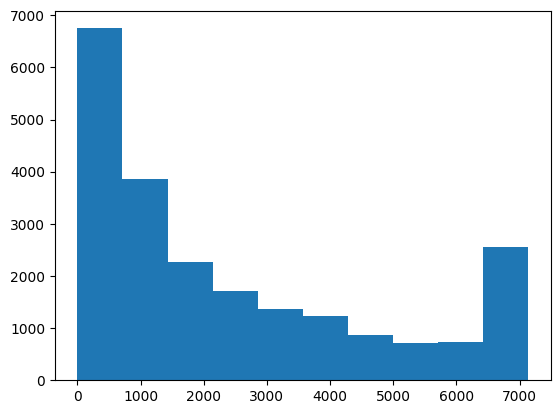

In [ ]:
temp = df_final[(df_final['StartTime'] > pd.to_datetime('2021-01-01')) & (df_final['StartTime'] < pd.to_datetime('2021-12-31'))]
plt.hist(temp['Power_kW_Mean'])


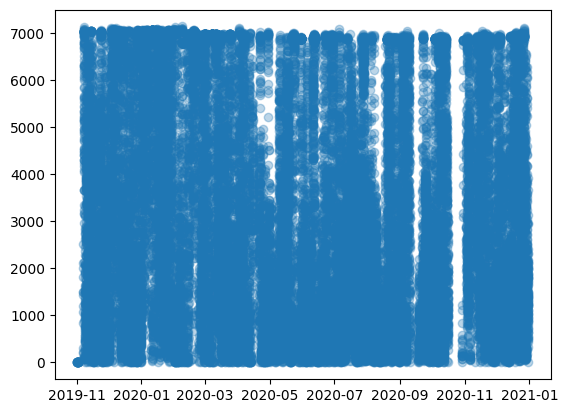

In [ ]:
temp = df_final[(df_final['StartTime'] > pd.to_datetime('2019-11-01')) & (df_final['StartTime'] < pd.to_datetime('2020-12-31'))]

plt.scatter(temp['StartTime'], temp['Power_kW_Mean'],alpha = 0.3)

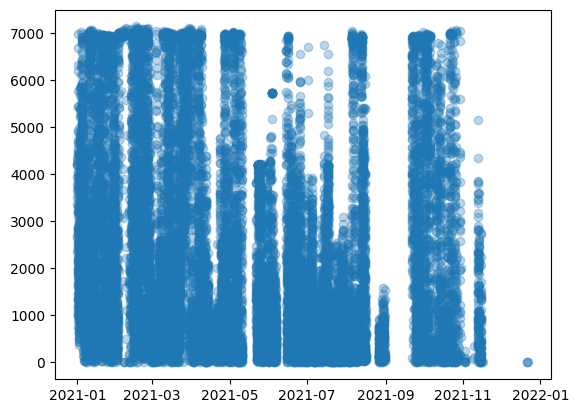

In [ ]:
temp = df_final[(df_final['StartTime'] > pd.to_datetime('2021-01-01')) & (df_final['StartTime'] < pd.to_datetime('2021-12-31'))]

plt.scatter(temp['StartTime'], temp['Power_kW_Mean'],alpha = 0.3)

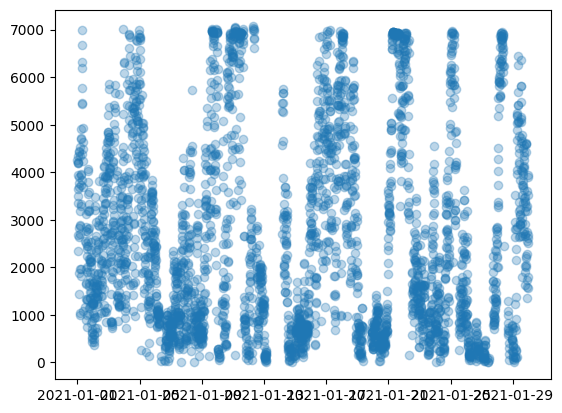

In [ ]:
temp = df_final[(df_final['StartTime'] > pd.to_datetime('2021-01-01')) & (df_final['StartTime'] < pd.to_datetime('2021-01-30'))]

plt.scatter(temp['StartTime'], temp['Power_kW_Mean'],alpha = 0.3)

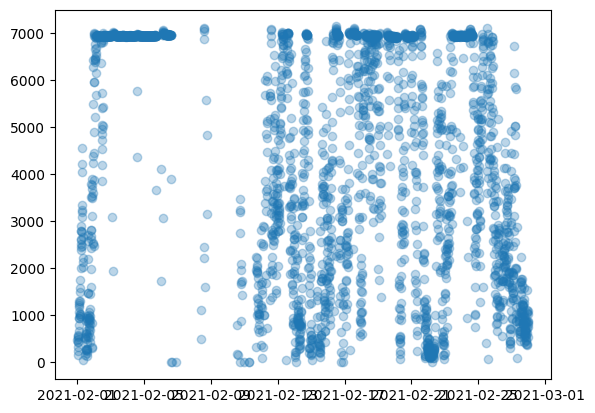

In [ ]:
temp = df_final[(df_final['StartTime'] > pd.to_datetime('2021-02-01')) & (df_final['StartTime'] < pd.to_datetime('2021-02-28'))]

plt.scatter(temp['StartTime'], temp['Power_kW_Mean'],alpha = 0.3)

In [ ]:

df_final['StartTime'].dt.month

1074       1
1106       1
3694       2
3989       2
3990       2
          ..
251200    11
251349    11
256377    12
256381    12
256508    12
Name: StartTime, Length: 117498, dtype: int64

In [ ]:
temp = df_final[(df_final['StartTime'] > pd.to_datetime('2019-11-01')) & (df_final['StartTime'] < pd.to_datetime('2020-12-31'))]
temp['month'] = temp['StartTime'].dt.month


<ipython-input-204-b53ae65ab92c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['month'] = temp['StartTime'].dt.month


<ipython-input-236-70759c61df65>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['month'] = temp['StartTime'].dt.month


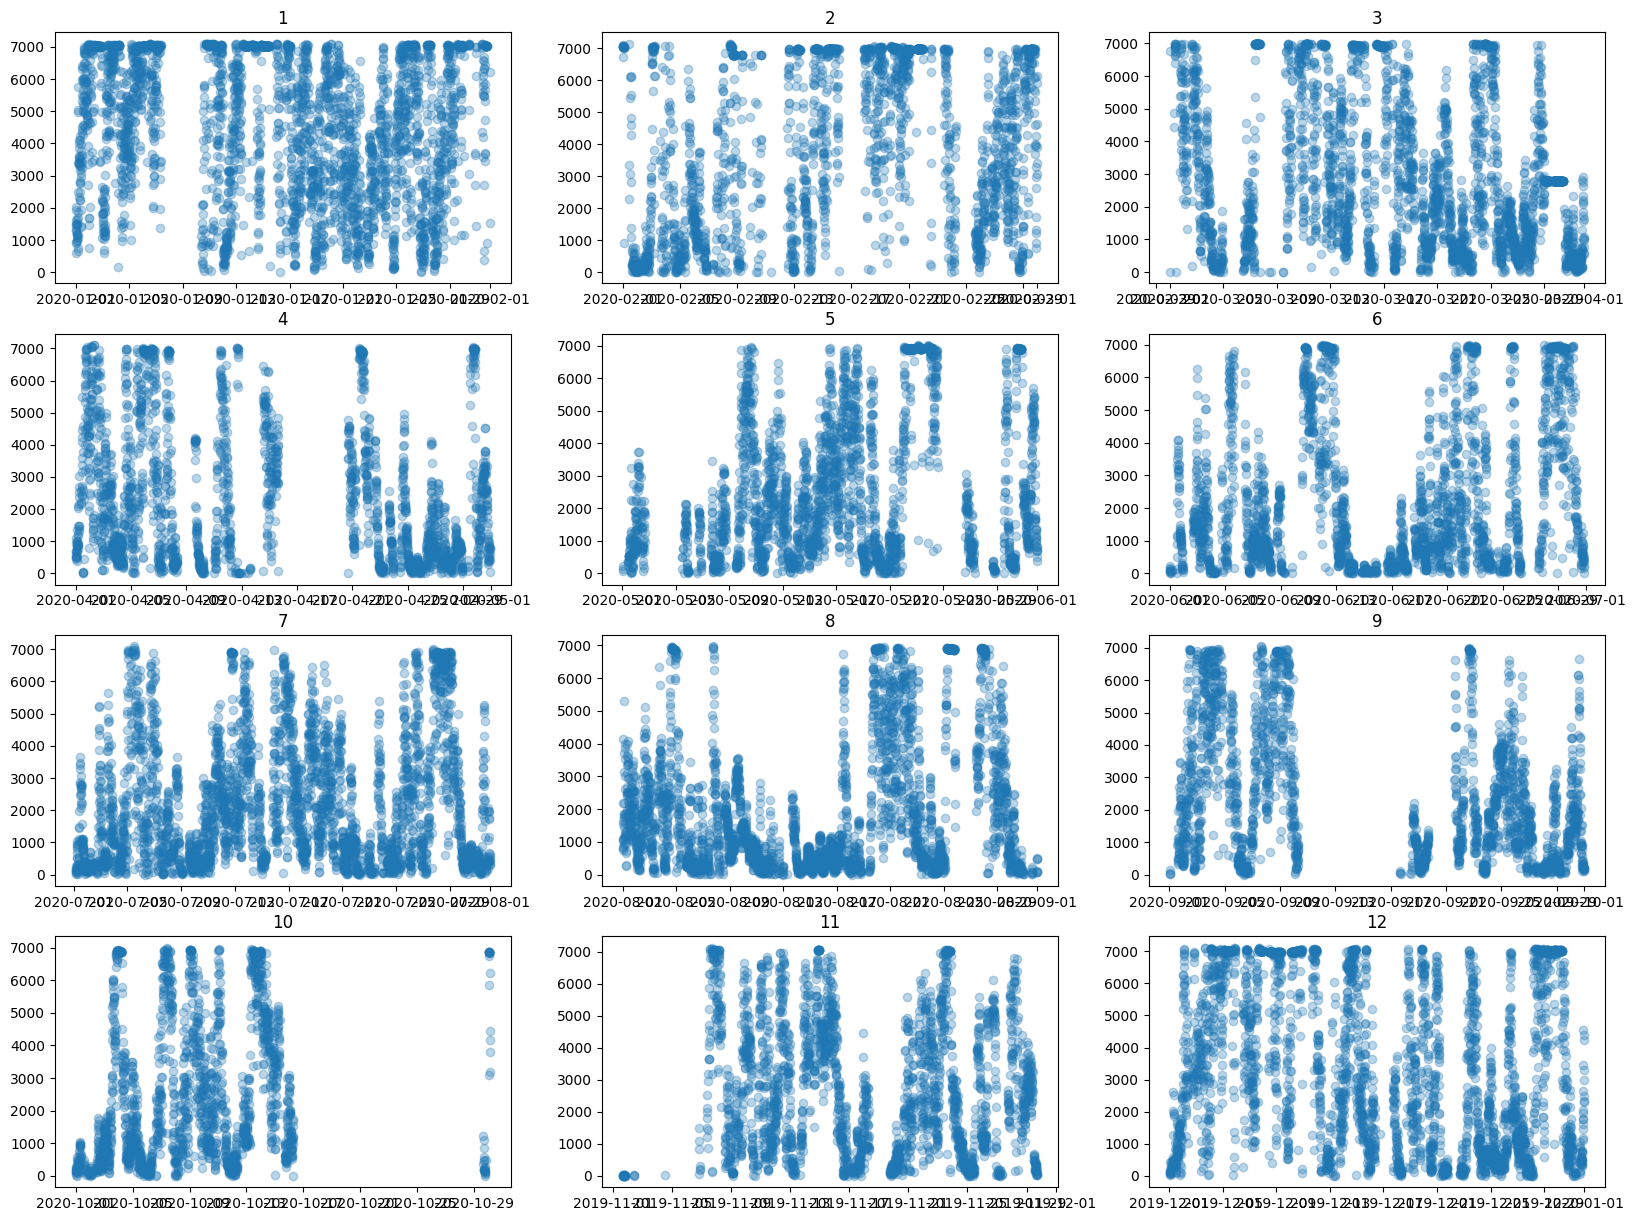

In [ ]:
temp = df_final[(df_final['StartTime'] > pd.to_datetime('2019-11-01')) & (df_final['StartTime'] < pd.to_datetime('2020-11-01'))]
temp['month'] = temp['StartTime'].dt.month
i = 0
j = 0
figure, axis = plt.subplots(4, 3, figsize=(20, 15))

for month in np.sort((temp['month']).unique()):
  if( (i!=0) & ((i+1)%4==0)):
    j = j + 1
  if( (i!=0) & ((i+1)%4==0)):
    i = 0
  temp_df_obj = temp[(temp['month'] == month)]



  axis[j, i].scatter(temp_df_obj['StartTime'], temp_df_obj['Power_kW_Mean'],alpha = 0.3)
  axis[j, i].set_title(month)
  i = i +1

plt.show()

<ipython-input-238-42a16f717ec3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['month'] = temp['StartTime'].dt.month


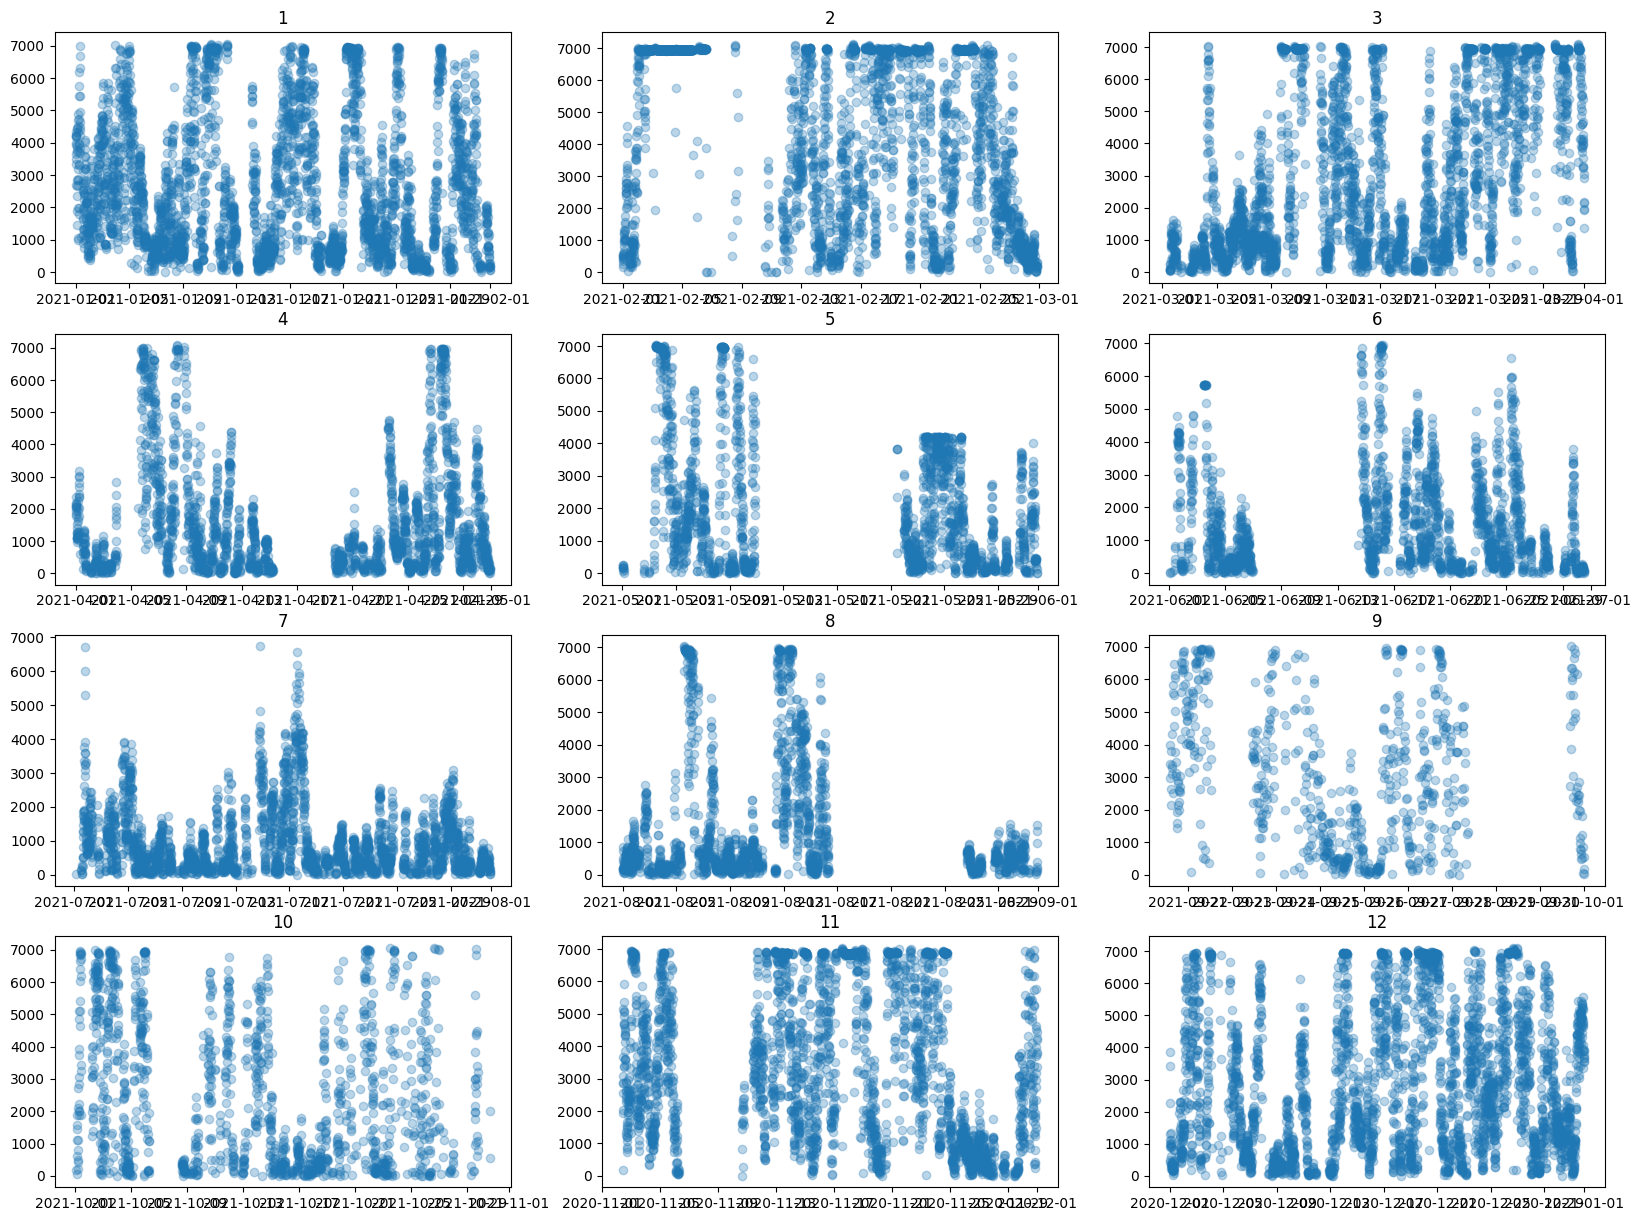

In [ ]:
temp = df_final[(df_final['StartTime'] > pd.to_datetime('2020-11-01')) & (df_final['StartTime'] < pd.to_datetime('2021-11-01'))]
temp['month'] = temp['StartTime'].dt.month
i = 0
j = 0
figure, axis = plt.subplots(4, 3, figsize=(20, 15))

for month in np.sort((temp['month']).unique()):
  if( (i!=0) & ((i+1)%4==0)):
    j = j + 1
  if( (i!=0) & ((i+1)%4==0)):
    i = 0
  temp_df_obj = temp[(temp['month'] == month)]



  axis[j, i].scatter(temp_df_obj['StartTime'], temp_df_obj['Power_kW_Mean'],alpha = 0.3)
  axis[j, i].set_title(month)
  i = i +1

plt.show()

<ipython-input-218-454f5ce72b58>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['month'] = temp['StartTime'].dt.month


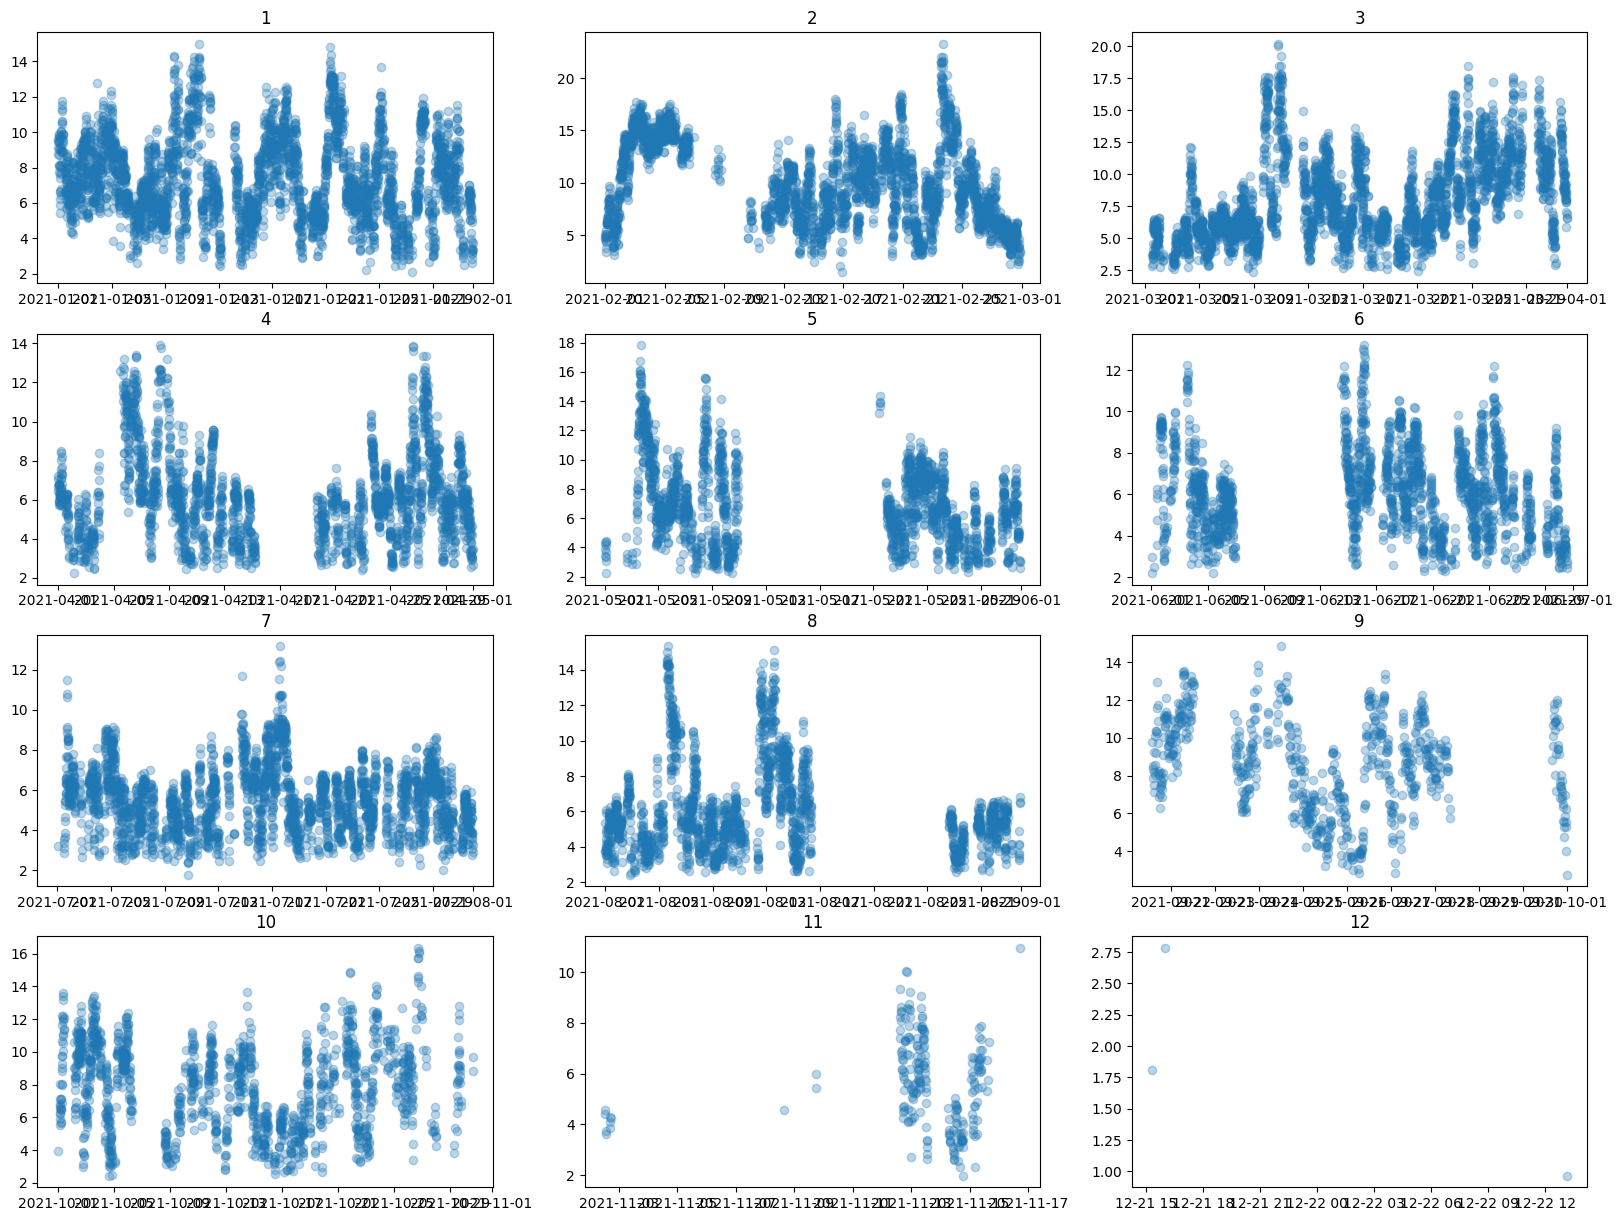

In [ ]:
temp = df_final[(df_final['StartTime'] > pd.to_datetime('2021-01-01')) & (df_final['StartTime'] < pd.to_datetime('2021-12-31'))]
temp['month'] = temp['StartTime'].dt.month
i = 0
j = 0
figure, axis = plt.subplots(4, 3, figsize=(20, 15))

for month in np.sort((temp['month']).unique()):
  if( (i!=0) & ((i+1)%4==0)):
    j = j + 1
  if( (i!=0) & ((i+1)%4==0)):
    i = 0
  temp_df_obj = temp[(temp['month'] == month)]



  axis[j, i].scatter(temp_df_obj['StartTime'], temp_df_obj['Anemo_T_Mean'],alpha = 0.3)
  axis[j, i].set_title(month)
  i = i +1

plt.show()

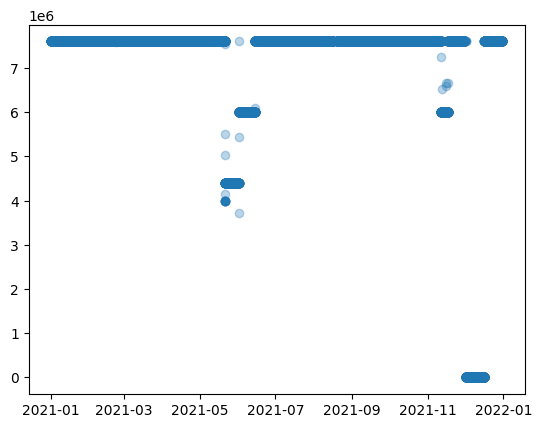

In [ ]:
temp = ele_df[(ele_df['StartTime'] > pd.to_datetime('2021-01-01')) & (ele_df['StartTime'] < pd.to_datetime('2021-12-31'))]

plt.scatter(temp['StartTime'], temp['TurbineOperatingPoint_kW_Mean'],alpha = 0.3)


(array([18699.,   812.,   235.,   214.,   154.,   119.,    68.,    67.,
           47.,    20.]),
 array([-0.18605274,  8.79530866, 17.77667006, 26.75803146, 35.73939286,
        44.72075426, 53.70211566, 62.68347706, 71.66483847, 80.64619987,
        89.62756127]),
 <BarContainer object of 10 artists>)

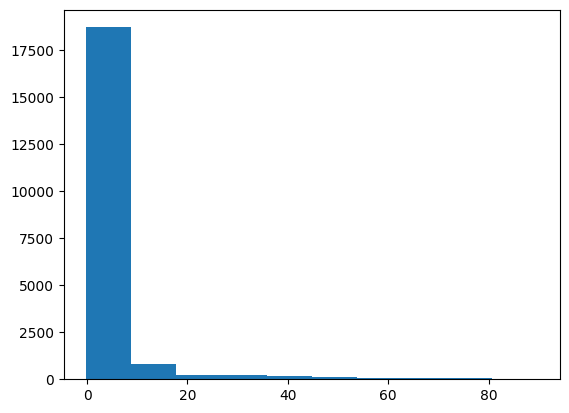

In [ ]:
plt.hist(temp['Pitch_Deg_Mean'])


(array([ 815., 6352., 9232., 5996., 3253., 1523.,  658.,  177.,   39.,
          10.]),
 array([ 0.96507212,  3.19586833,  5.42666453,  7.65746074,  9.88825694,
        12.11905315, 14.34984936, 16.58064556, 18.81144177, 21.04223798,
        23.27303418]),
 <BarContainer object of 10 artists>)

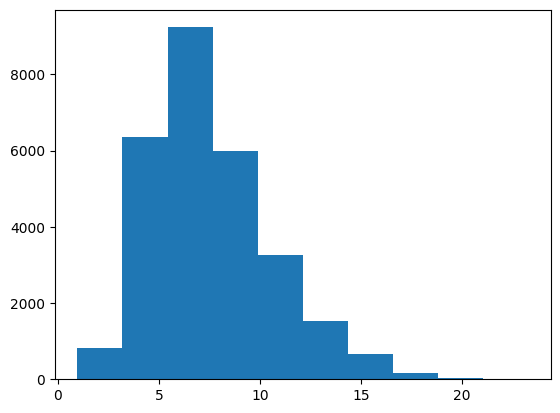

In [ ]:
plt.hist(temp['Anemo_T_Mean'])


(array([1513., 2199., 3278., 1370., 1449., 3233., 7292., 3861., 2454.,
        1406.]),
 array([8.02888000e-44, 3.59770876e+01, 7.19541752e+01, 1.07931263e+02,
        1.43908350e+02, 1.79885438e+02, 2.15862525e+02, 2.51839613e+02,
        2.87816701e+02, 3.23793788e+02, 3.59770876e+02]),
 <BarContainer object of 10 artists>)

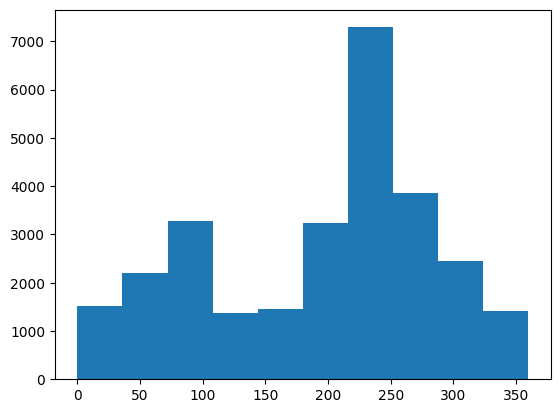

In [ ]:
plt.hist(temp['WindVane_T_Mean'])


(array([  83.,  488., 3840., 5921., 6616., 3951., 3436., 2911.,  655.,
         154.]),
 array([1.72019343e-02, 2.67417937e+00, 5.33115681e+00, 7.98813424e+00,
        1.06451117e+01, 1.33020891e+01, 1.59590666e+01, 1.86160440e+01,
        2.12730214e+01, 2.39299989e+01, 2.65869763e+01]),
 <BarContainer object of 10 artists>)

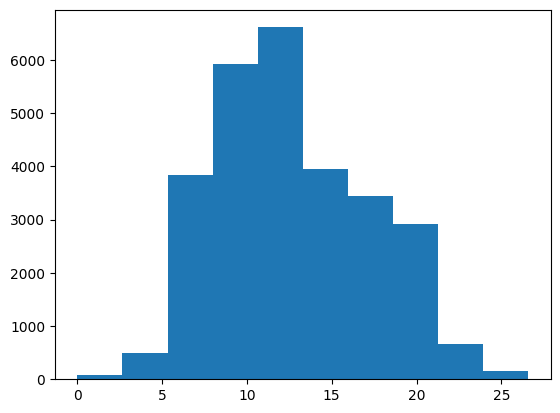

In [ ]:
plt.hist(temp['temp_T_Mean'])


(array([ 267.,  270.,  746., 1765., 3971., 4755., 5326., 5842., 3514.,
        1534.]),
 array([ 956.15380239,  963.86261752,  971.57143265,  979.28024778,
         986.98906291,  994.69787804, 1002.40669317, 1010.1155083 ,
        1017.82432343, 1025.53313856, 1033.24195369]),
 <BarContainer object of 10 artists>)

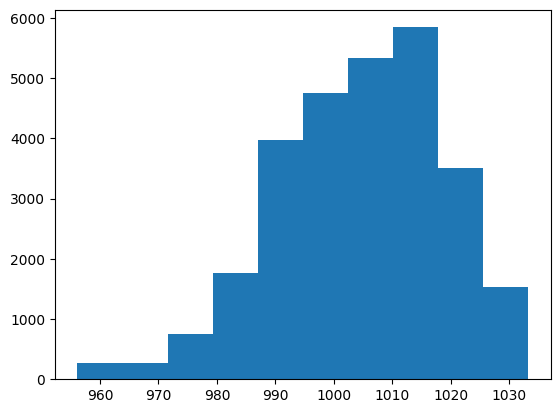

In [ ]:
plt.hist(temp['Barmoeter_1_Mean'])


(array([5.000e+01, 1.620e+02, 2.520e+02, 4.240e+02, 8.480e+02, 2.631e+04,
        2.000e+00, 5.000e+00, 0.000e+00, 2.000e+00]),
 array([ 4.66780822,  9.36252472, 14.05724123, 18.75195773, 23.44667424,
        28.14139074, 32.83610724, 37.53082375, 42.22554025, 46.92025676,
        51.61497326]),
 <BarContainer object of 10 artists>)

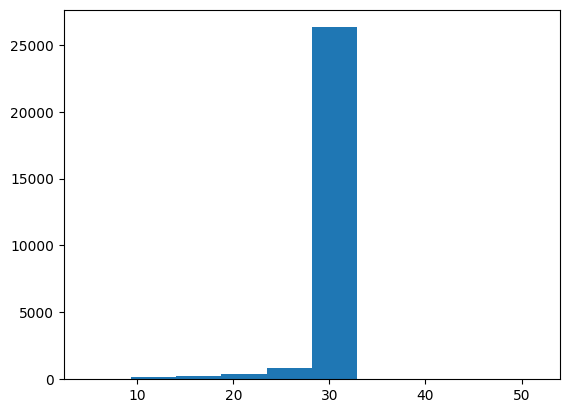

In [ ]:
plt.hist(temp['CtrlrState_Mean'])